In [1]:
# Load Libraries
library(Seurat)
library(SeuratWrappers)
library(reticulate)
library(dplyr)
library(data.table)
library(ggplot2)
library(gplots)
library(RColorBrewer)
library(purrr)
library(monocle3)
library(ComplexHeatmap)
library(circlize)

# Set Working Directory
setwd("../")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess



Attaching package: ‘purrr’


The following object is masked from ‘package:data.table’:

    transpose


Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following object is masked from ‘package:SeuratObject’:

    intersect


The followi

In [2]:
col2hex(c("mediumorchid","forestgreen"))

[1] "#BA55D3" "#228B22"

# Load Data

In [3]:
data.pro <- readRDS("GBMProject/GBMOrganoid/Checkpoints/4b_MonoclePT-PRO_seurat.rds")
data.mes <- readRDS("GBMProject/GBMOrganoid/Checkpoints/4b_MonoclePT-MES_seurat.rds")

In [4]:
cds.pro <- readRDS("GBMProject/GBMOrganoid/Checkpoints/4b_MonoclePT-PRO_cds.rds")
cds.mes <- readRDS("GBMProject/GBMOrganoid/Checkpoints/4b_MonoclePT-MES_cds.rds")

# Fig 6a - UMAP idents

In [8]:
Idents(data.pro) <- 'orig.ident'
levels(data.pro)

[1] "TXP_PRO" "MGH102"  "MGH143"  "MGH110"  "PRO"

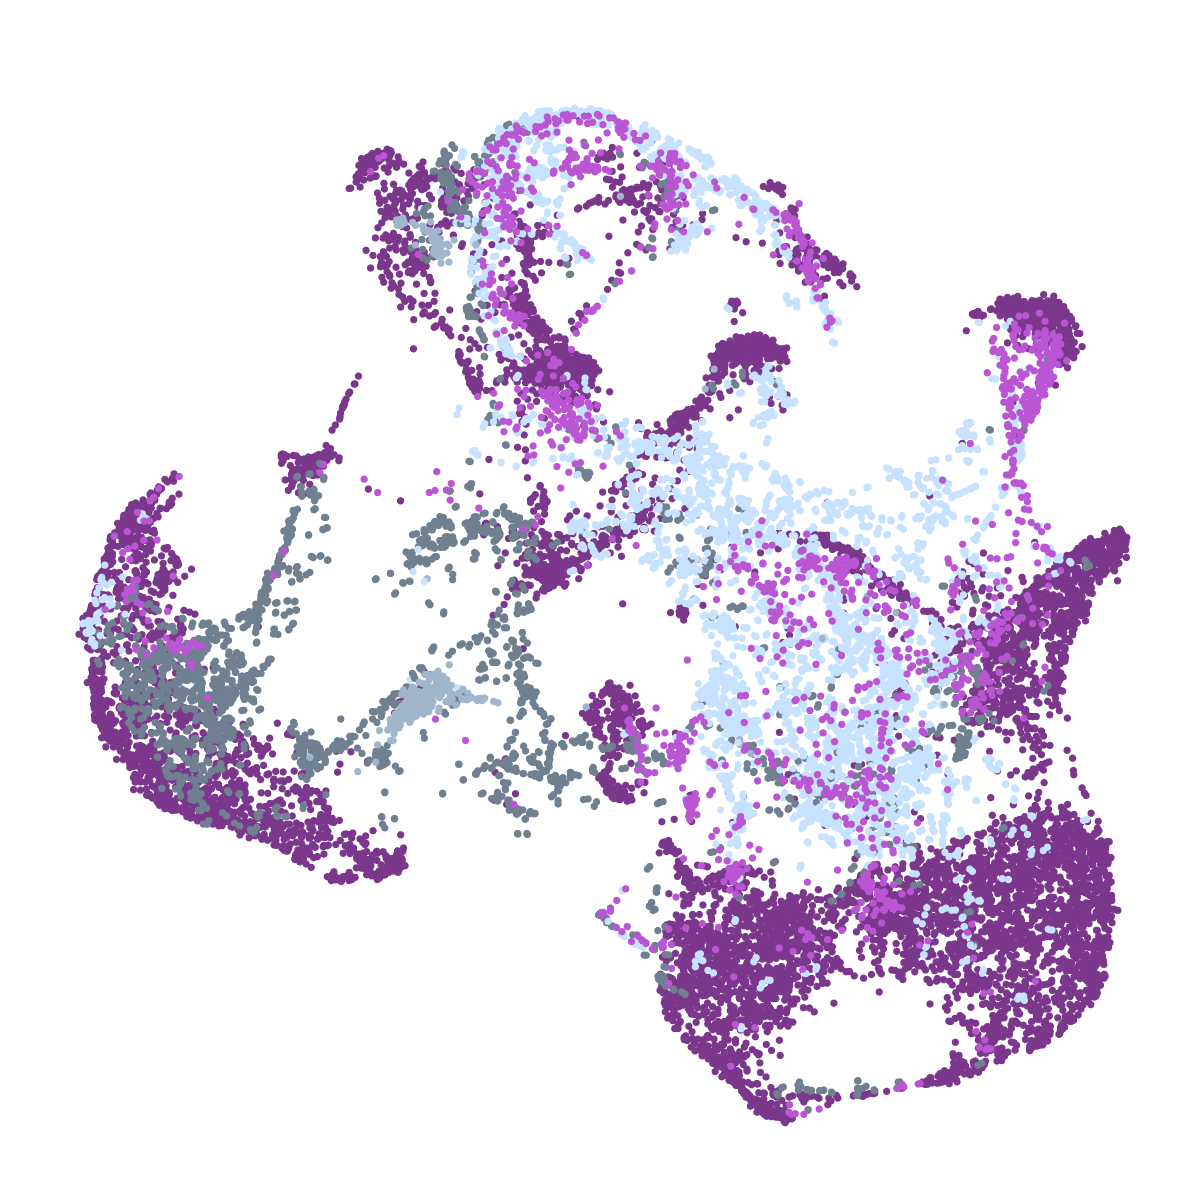

In [14]:
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(data.pro, reduction = "umap.integrated.cca", group.by = "orig.ident", label = FALSE,
       cols=c("PRO"="mediumorchid","TXP_PRO"="mediumorchid4","MGH102"="slategray","MGH110"="slategray3","MGH143"="slategray1"), pt.size=1) + NoLegend() + NoAxes() + ggtitle("")

In [8]:
Idents(data.mes) <- 'orig.ident'
levels(data.mes)

[1] "TXP_MES" "MGH102"  "MGH113"  "MGH136"  "MGH151"  "MES"

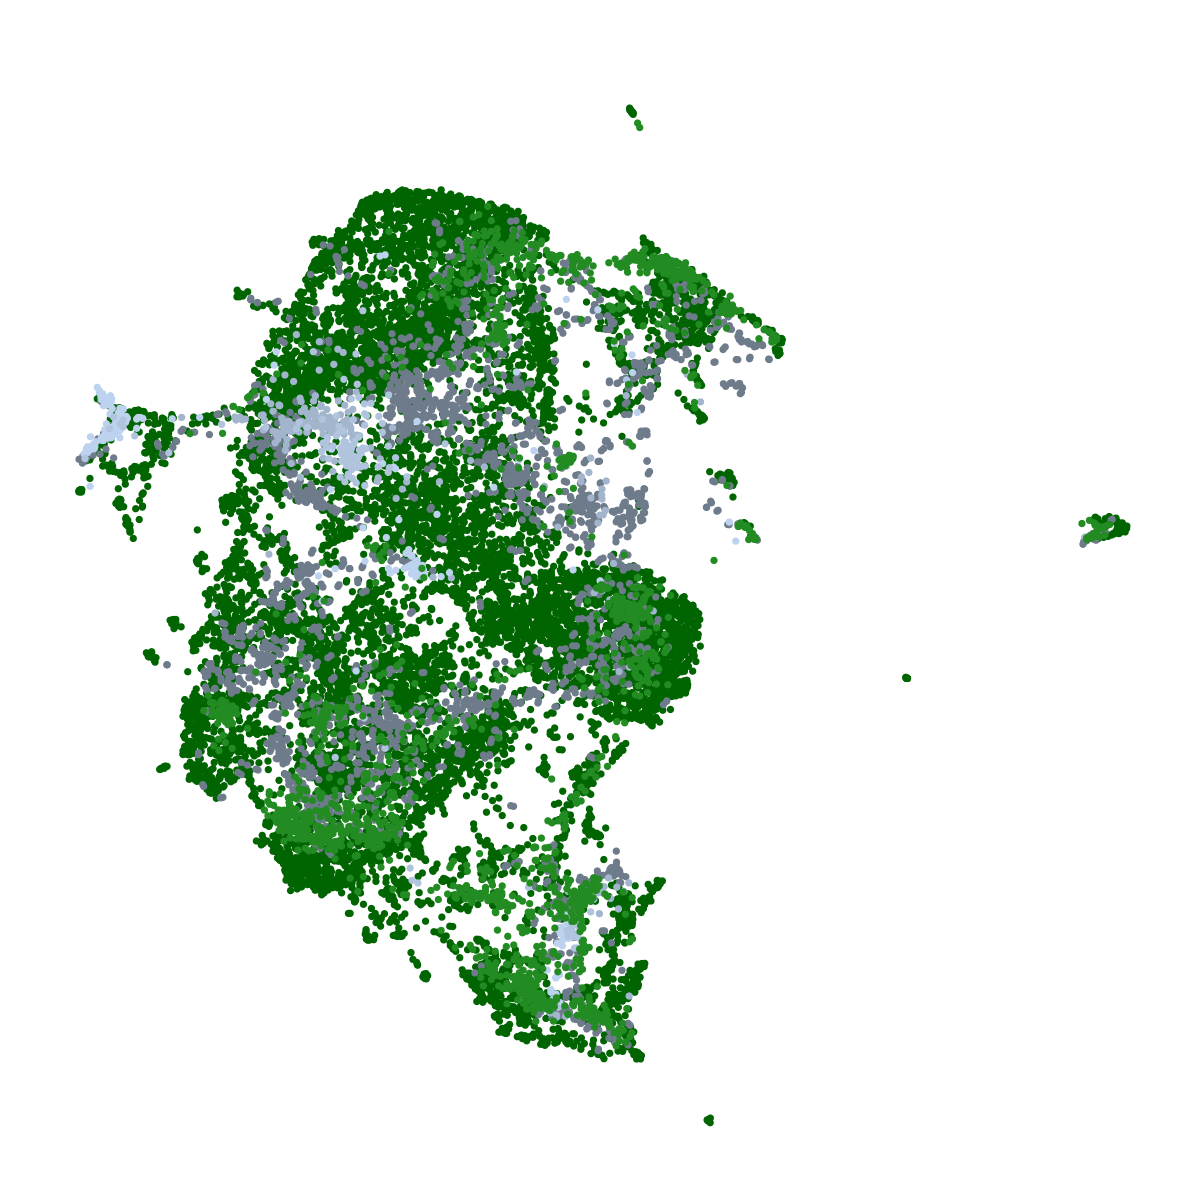

In [15]:
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(data.mes, reduction = "umap.integrated.cca", group.by = "orig.ident", label = FALSE,
       cols=c("MES"="forestgreen","TXP_MES"="darkgreen","MGH102"="lightsteelblue4","MGH113"="lightsteelblue3","MGH136"="lightsteelblue2","MGH151"="lightsteelblue"), 
        pt.size=1) + NoLegend() + NoAxes() + ggtitle("")

# Fig 6b - UMAP pseudotime

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


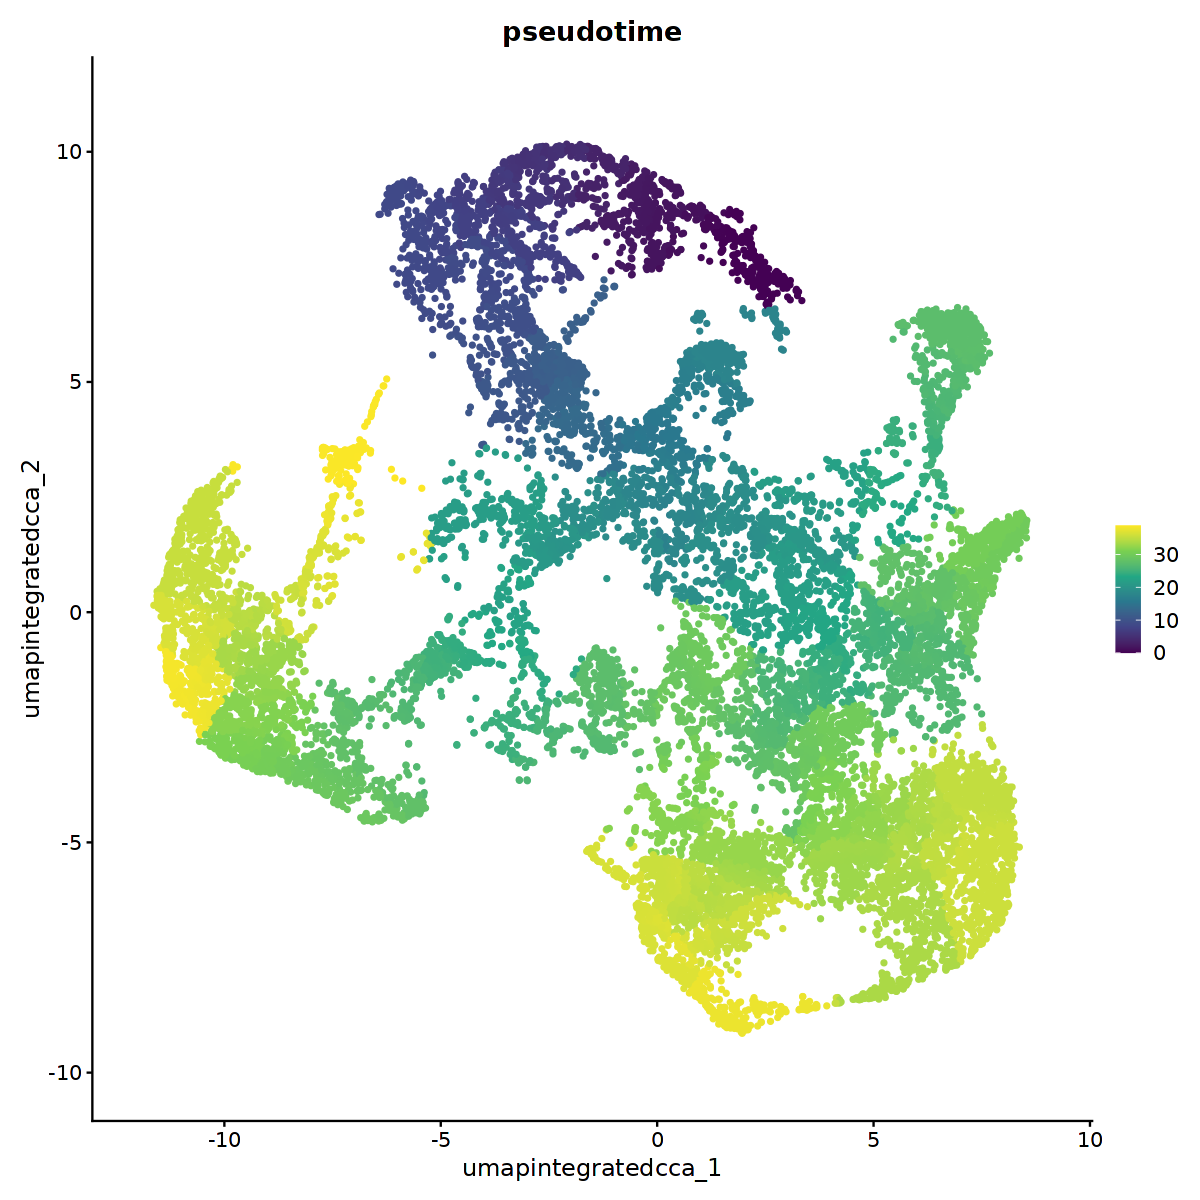

In [19]:
options(repr.plot.width=10, repr.plot.height=10)
FeaturePlot(data.pro, c("pseudotime"), reduction="umap.integrated.cca", pt.size = 1) + scale_color_viridis_c() #+ NoLegend() + NoAxes() + ggtitle("")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


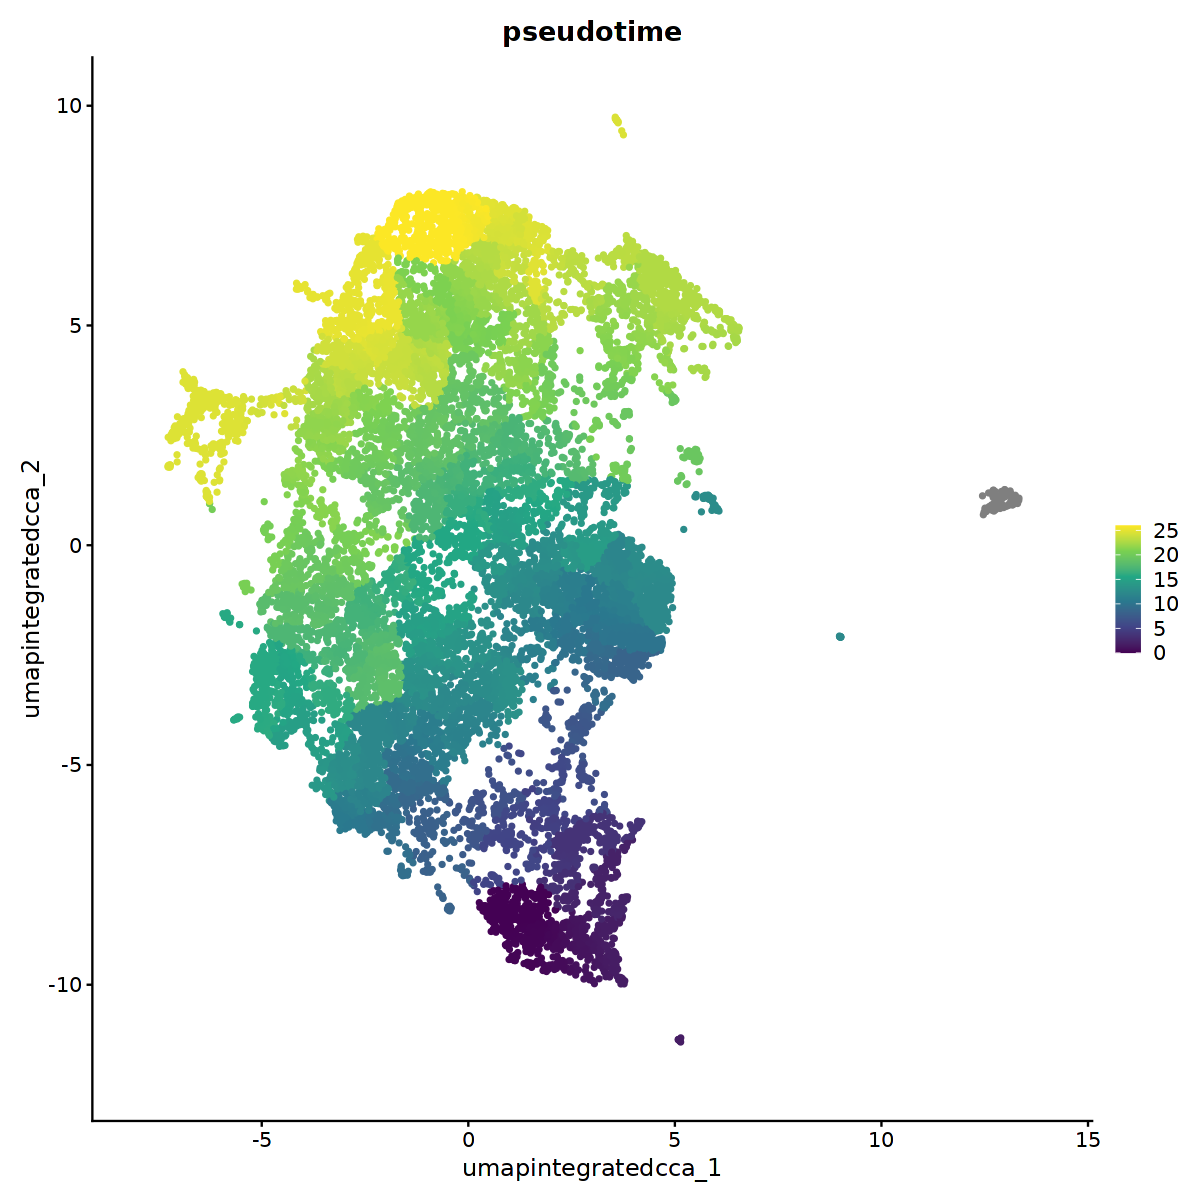

In [20]:
options(repr.plot.width=10, repr.plot.height=10)
FeaturePlot(data.mes, c("pseudotime"), reduction="umap.integrated.cca", pt.size = 1) + scale_color_viridis_c() #+ NoLegend() + NoAxes() + ggtitle("")

# Fig 6c - Psuedotime Heatmap

In [4]:
pt.matrix.pro <- as.matrix(read.csv("GBMProject/GBMOrganoid/GeneLists/PT_matrix_PRO.csv",skip = 1, row.names=1, header = FALSE))
colnames(pt.matrix.pro)<-NULL

pt.matrix.mes <- as.matrix(read.csv("GBMProject/GBMOrganoid/GeneLists/PT_matrix_MES.csv",skip = 1, row.names=1, header = FALSE))
colnames(pt.matrix.mes)<-NULL

`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



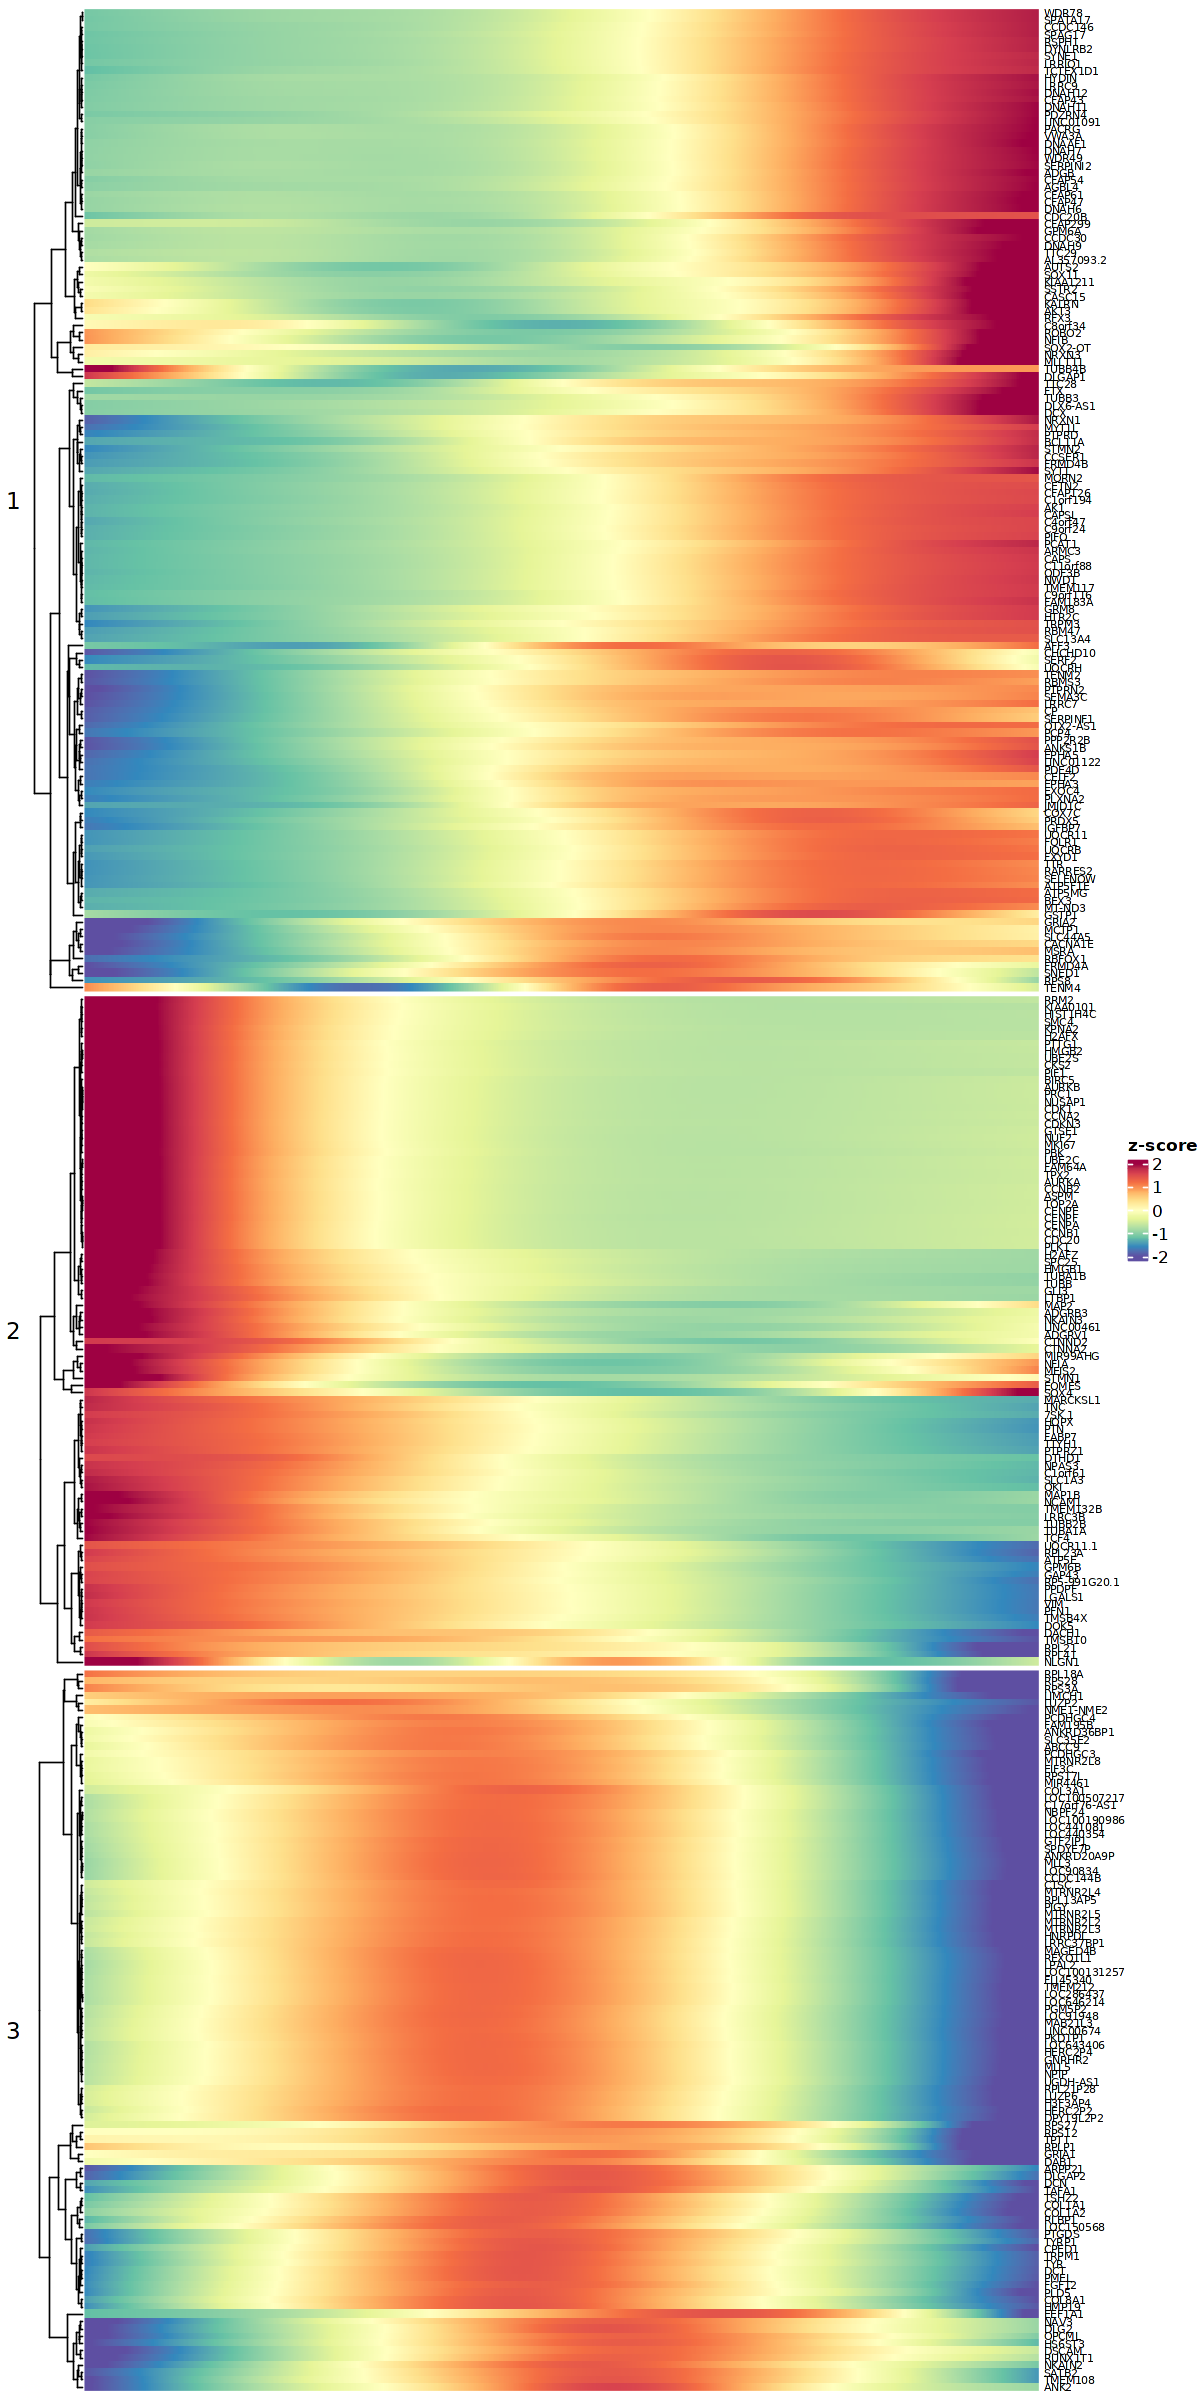

In [7]:
options(repr.plot.width=10, repr.plot.height=20)

#K means with 3 groups
htkm.pro <- draw(Heatmap(
  pt.matrix.pro,
  name                         = "z-score",
  col                          = colorRamp2(seq(from=-2,to=2,length=11),rev(brewer.pal(11, "Spectral"))),
  show_row_names               = TRUE,
  show_column_names            = FALSE,
  row_names_gp                 = gpar(fontsize = 6),
  km = 3,
  row_title_rot                = 0,
  cluster_rows                 = TRUE,
  cluster_row_slices           = FALSE,
  cluster_columns              = FALSE))

order1 <- rownames(pt.matrix.pro)[unlist(row_order(htkm.pro)[1], use.names=FALSE)]
order2 <- rownames(pt.matrix.pro)[unlist(row_order(htkm.pro)[2], use.names=FALSE)]
order3 <- rownames(pt.matrix.pro)[unlist(row_order(htkm.pro)[3], use.names=FALSE)]

write.csv(order1, "GBMProject/GBMOrganoid/GeneLists/PT_heatmaprows1_PRO.csv")
write.csv(order2, "GBMProject/GBMOrganoid/GeneLists/PT_heatmaprows2_PRO.csv")
write.csv(order3, "GBMProject/GBMOrganoid/GeneLists/PT_heatmaprows3_PRO.csv")

`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



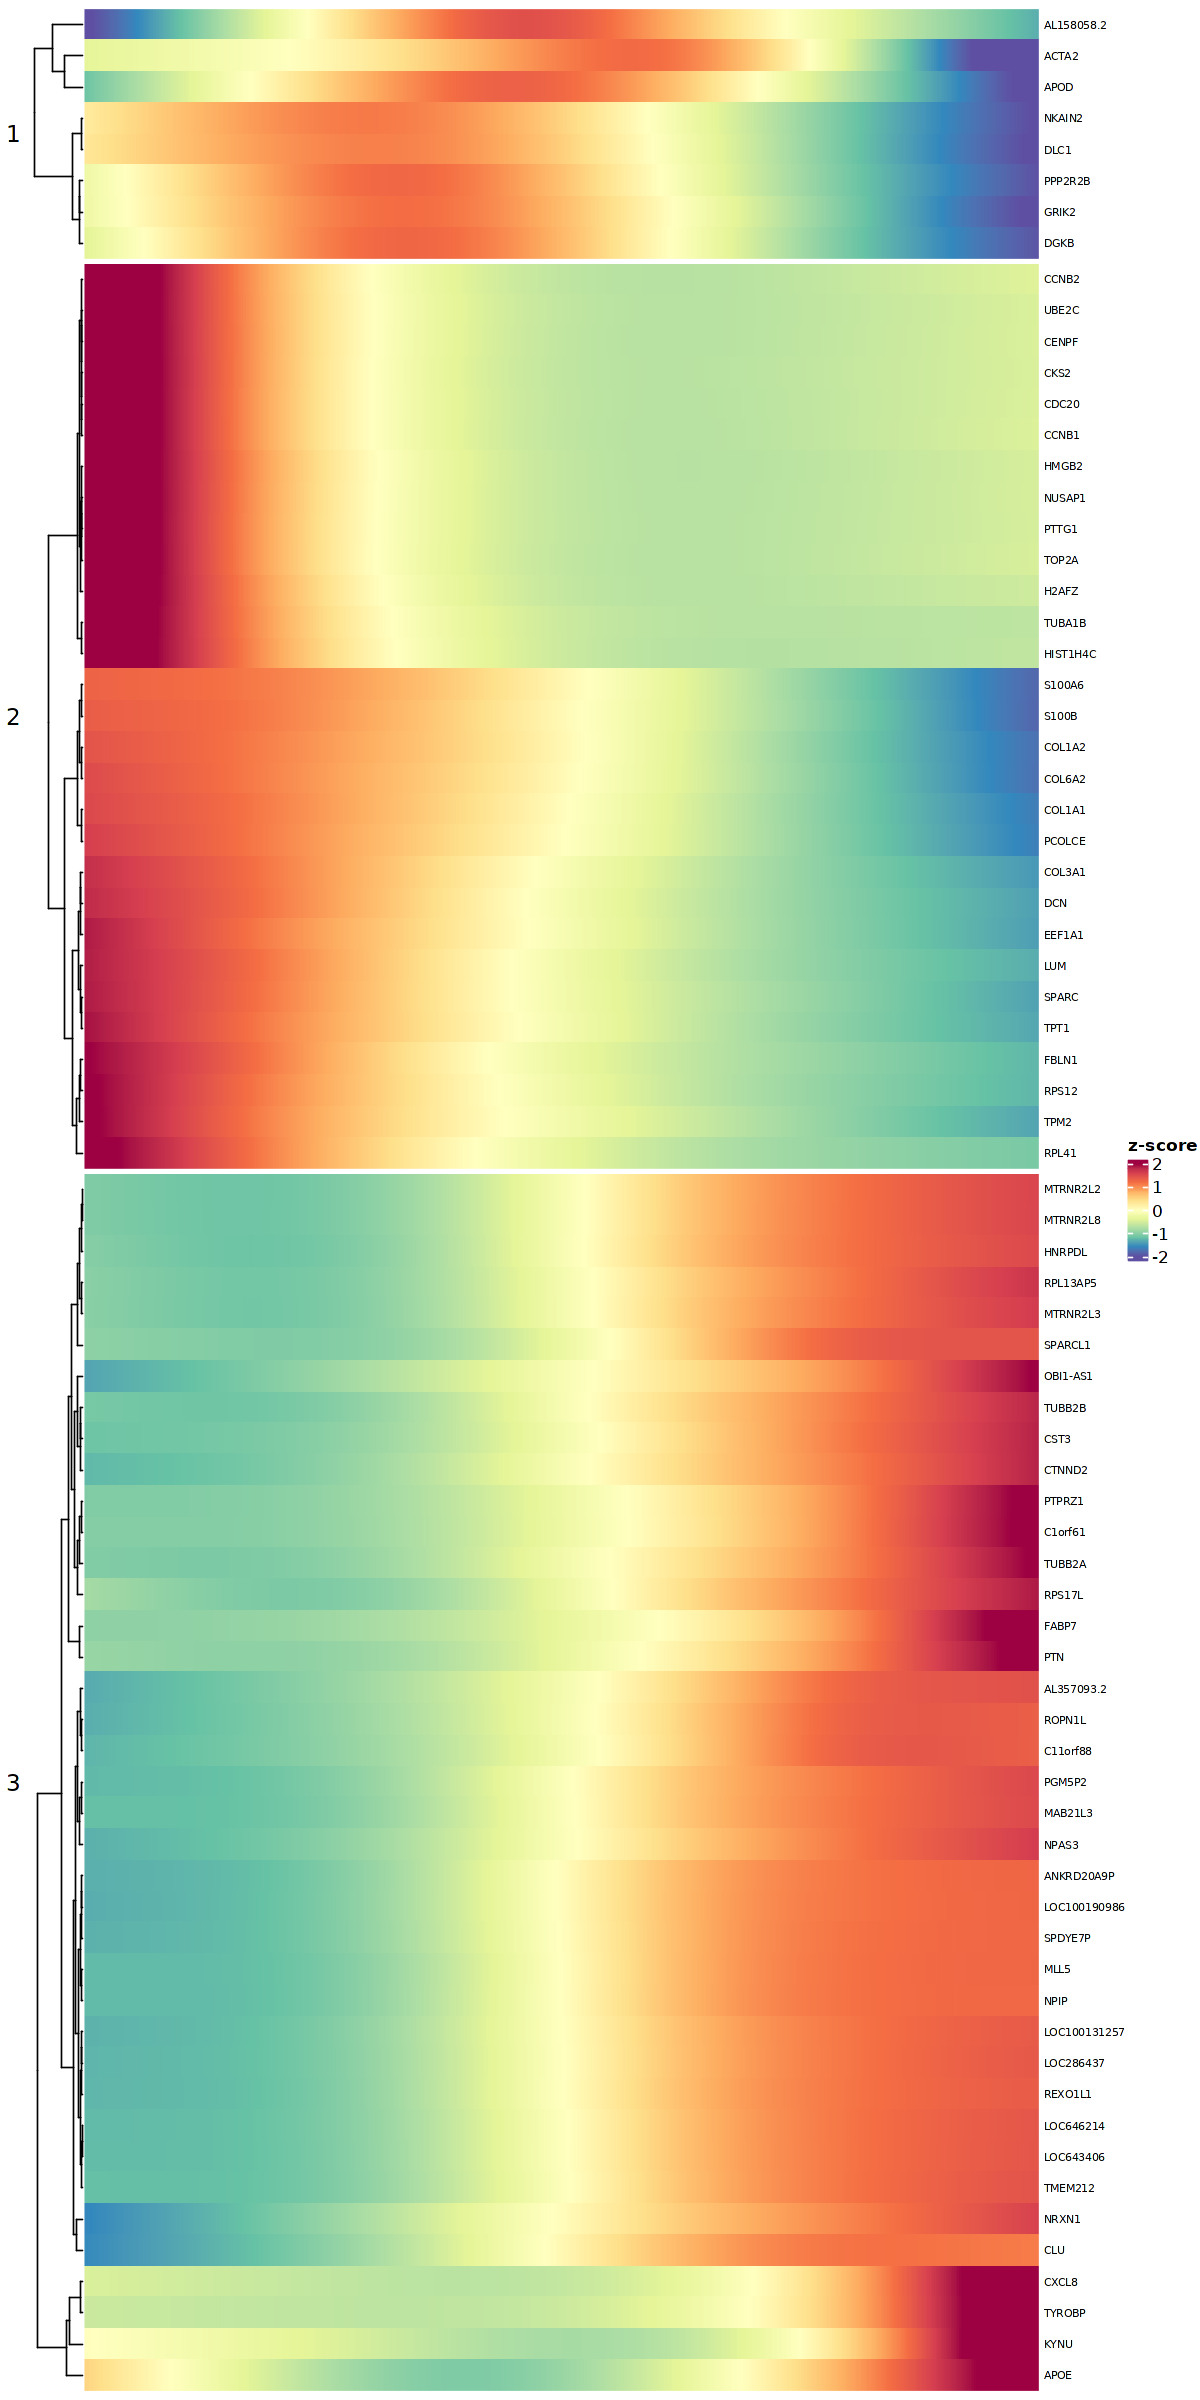

In [9]:
options(repr.plot.width=10, repr.plot.height=20)

#K means with 3 groups
htkm.mes <- draw(Heatmap(
  pt.matrix.mes,
  name                         = "z-score",
  col                          = colorRamp2(seq(from=-2,to=2,length=11),rev(brewer.pal(11, "Spectral"))),
  show_row_names               = TRUE,
  show_column_names            = FALSE,
  row_names_gp                 = gpar(fontsize = 6),
  km = 3,
  row_title_rot                = 0,
  cluster_rows                 = TRUE,
  cluster_row_slices           = FALSE,
  cluster_columns              = FALSE))

order1 <- rownames(pt.matrix.mes)[unlist(row_order(htkm.mes)[1], use.names=FALSE)]
order2 <- rownames(pt.matrix.mes)[unlist(row_order(htkm.mes)[2], use.names=FALSE)]
order3 <- rownames(pt.matrix.mes)[unlist(row_order(htkm.mes)[3], use.names=FALSE)]

write.csv(order1, "GBMProject/GBMOrganoid/GeneLists/PT_heatmaprows1_MES.csv")
write.csv(order2, "GBMProject/GBMOrganoid/GeneLists/PT_heatmaprows2_MES.csv")
write.csv(order3, "GBMProject/GBMOrganoid/GeneLists/PT_heatmaprows3_MES.csv")

# Fig 6e - Bar Plot

In [4]:
Idents(data.pro) <- 'orig.ident'
levels(data.pro)

[1] "TXP_PRO" "MGH102"  "MGH143"  "MGH110"  "PRO"

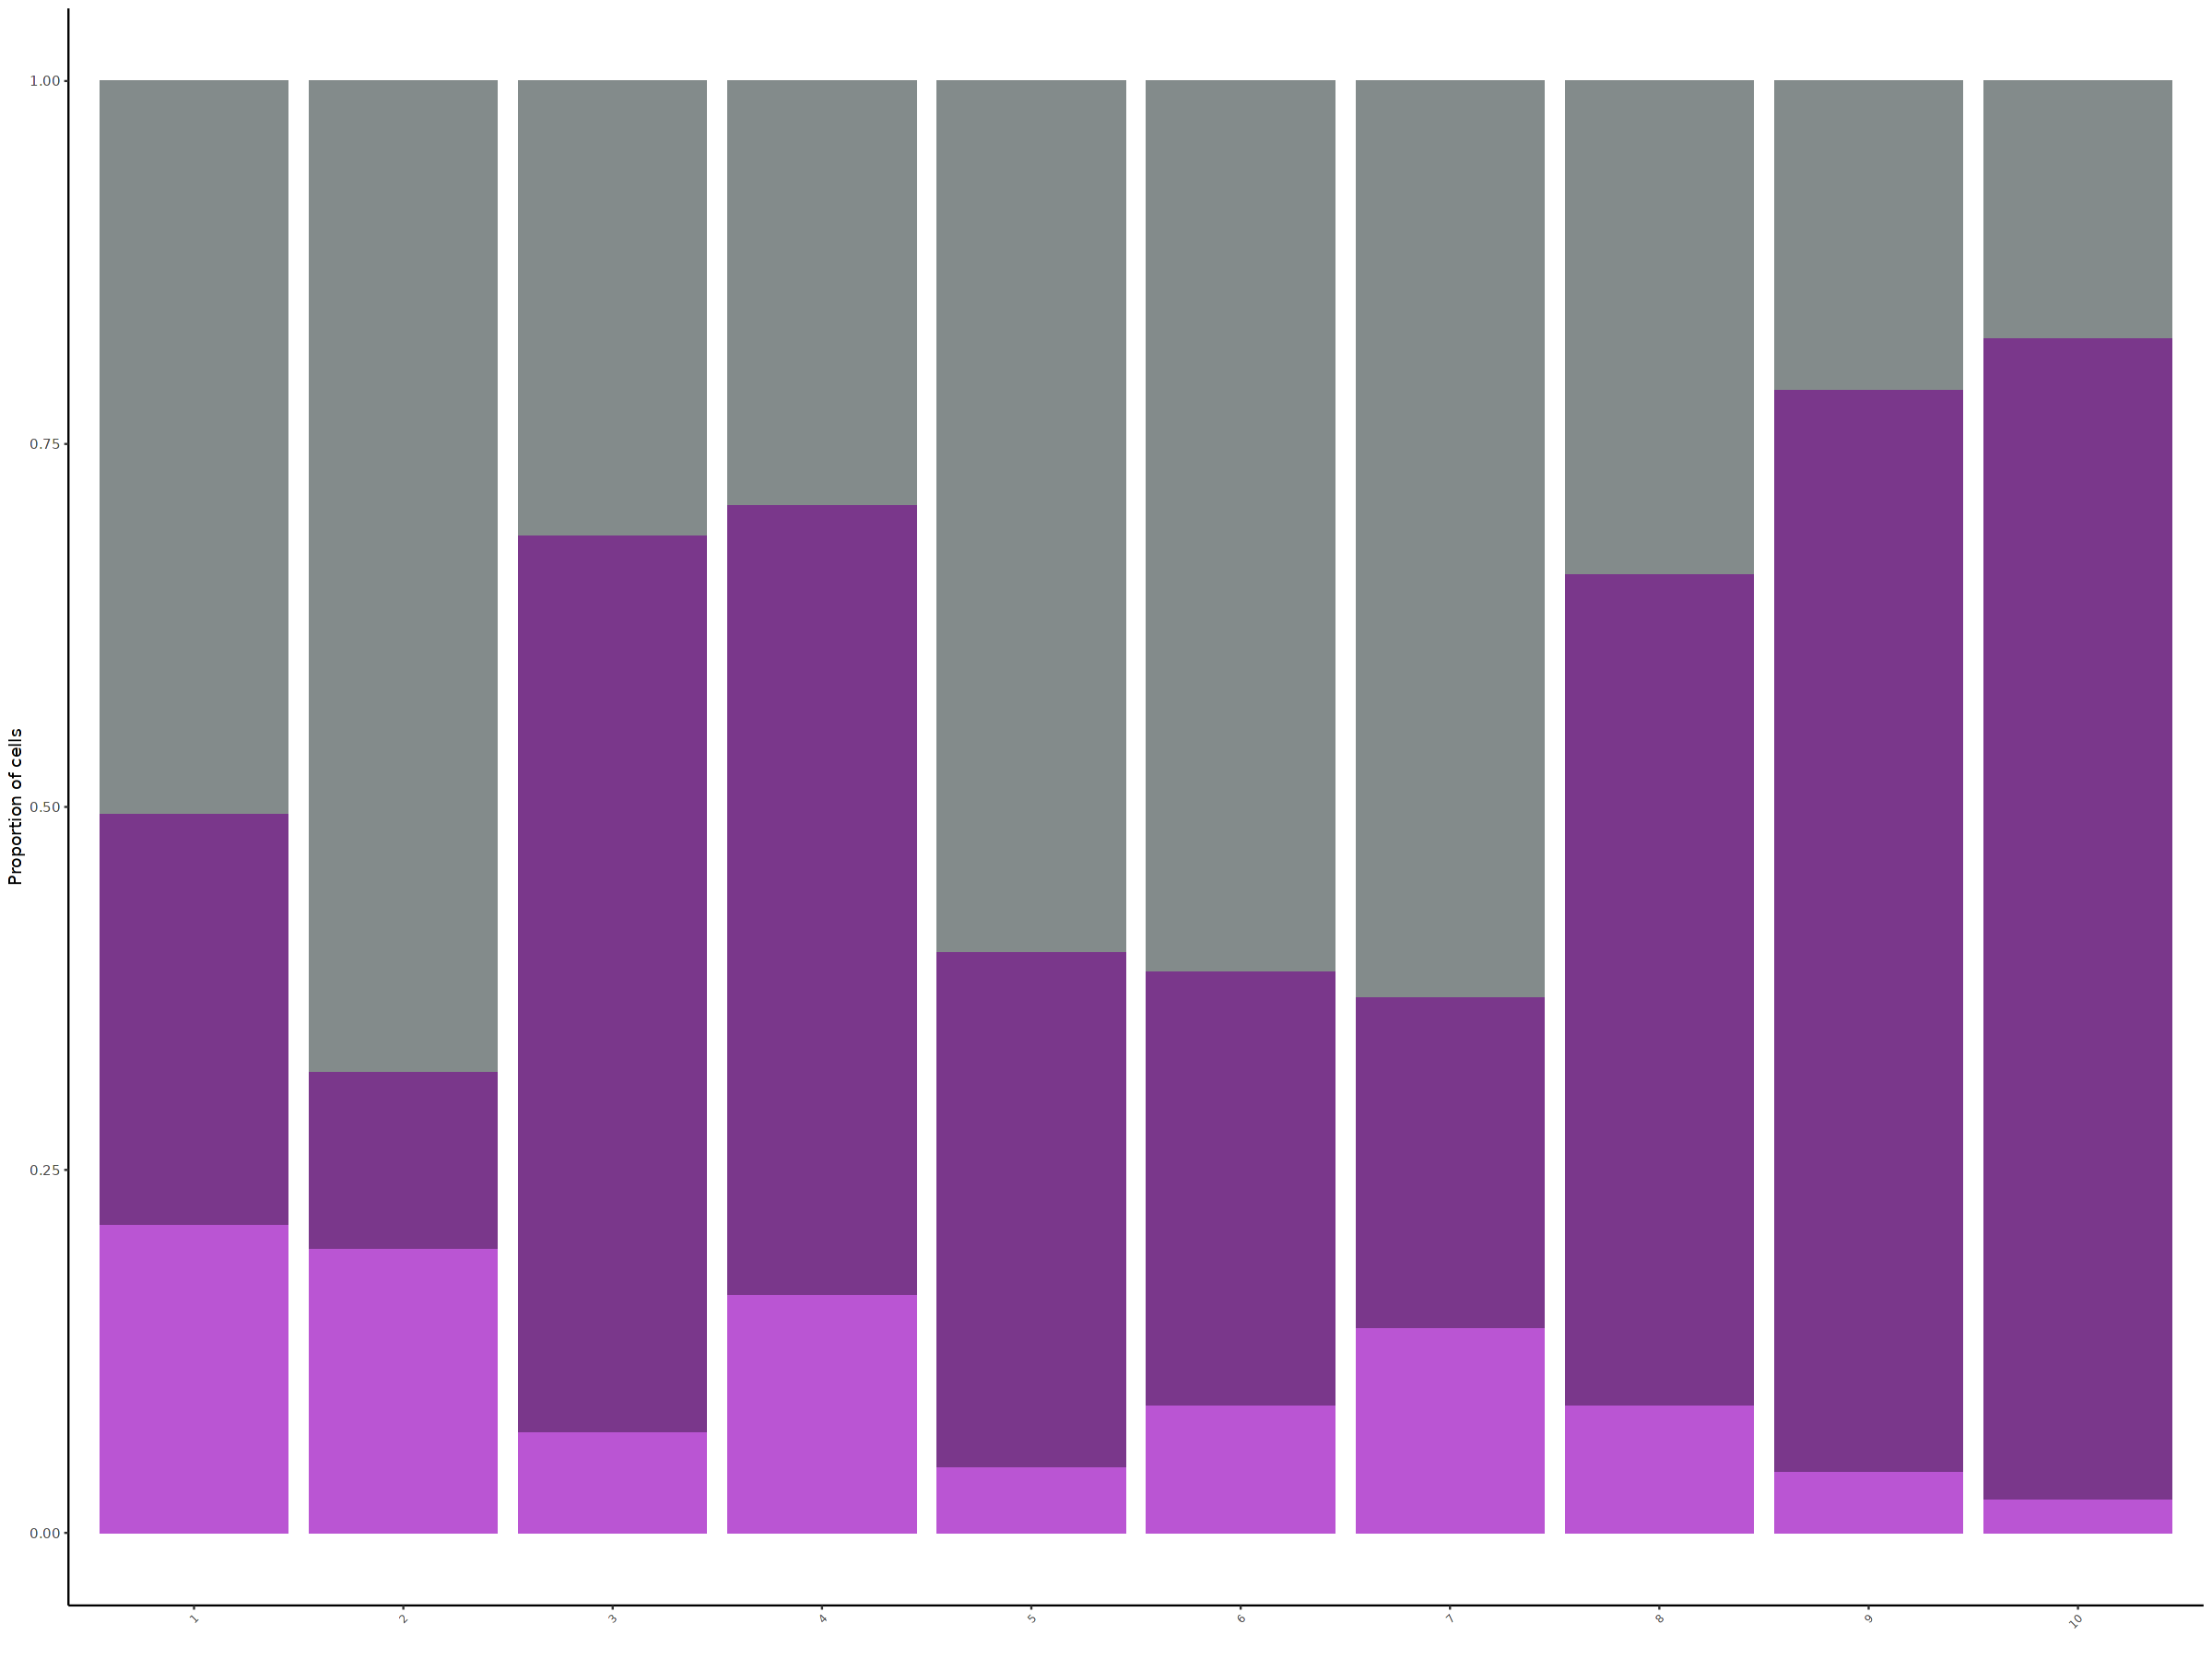

In [10]:
# Calculate cell type proportions
prop.pro <- data.frame(prop.table(table(data.pro$orig.ident,data.pro$pt_bin)))

colnames(prop.pro) <- c("Source","Bin", "Frac")
prop.pro$Source <- as.character(prop.pro$Source)
prop.pro$Bin <- as.character(prop.pro$Bin)

prop.pro$Source <- factor(prop.pro$Source, levels=c("MGH102","MGH143","MGH110","TXP_PRO","PRO"))
prop.pro$Bin <- factor(prop.pro$Bin, levels=c("1","2","3","4","5","6","7","8","9","10"))

options(repr.plot.width = 8, repr.plot.height = 15)

myColors <- c("azure4","azure4","azure4","mediumorchid4","mediumorchid")

prop.pro.plot <- ggplot(prop.pro, aes(fill=factor(Source), y=Frac, x=Bin)) +
  geom_bar(position="fill", stat="identity", width = .9) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 7)) +
  labs(x = "", y = "Proportion of cells") +
  guides(fill = guide_legend(title="Cell Type")) + scale_fill_manual(values=myColors) + NoLegend()

options(repr.plot.width=20, repr.plot.height=15)
prop.pro.plot

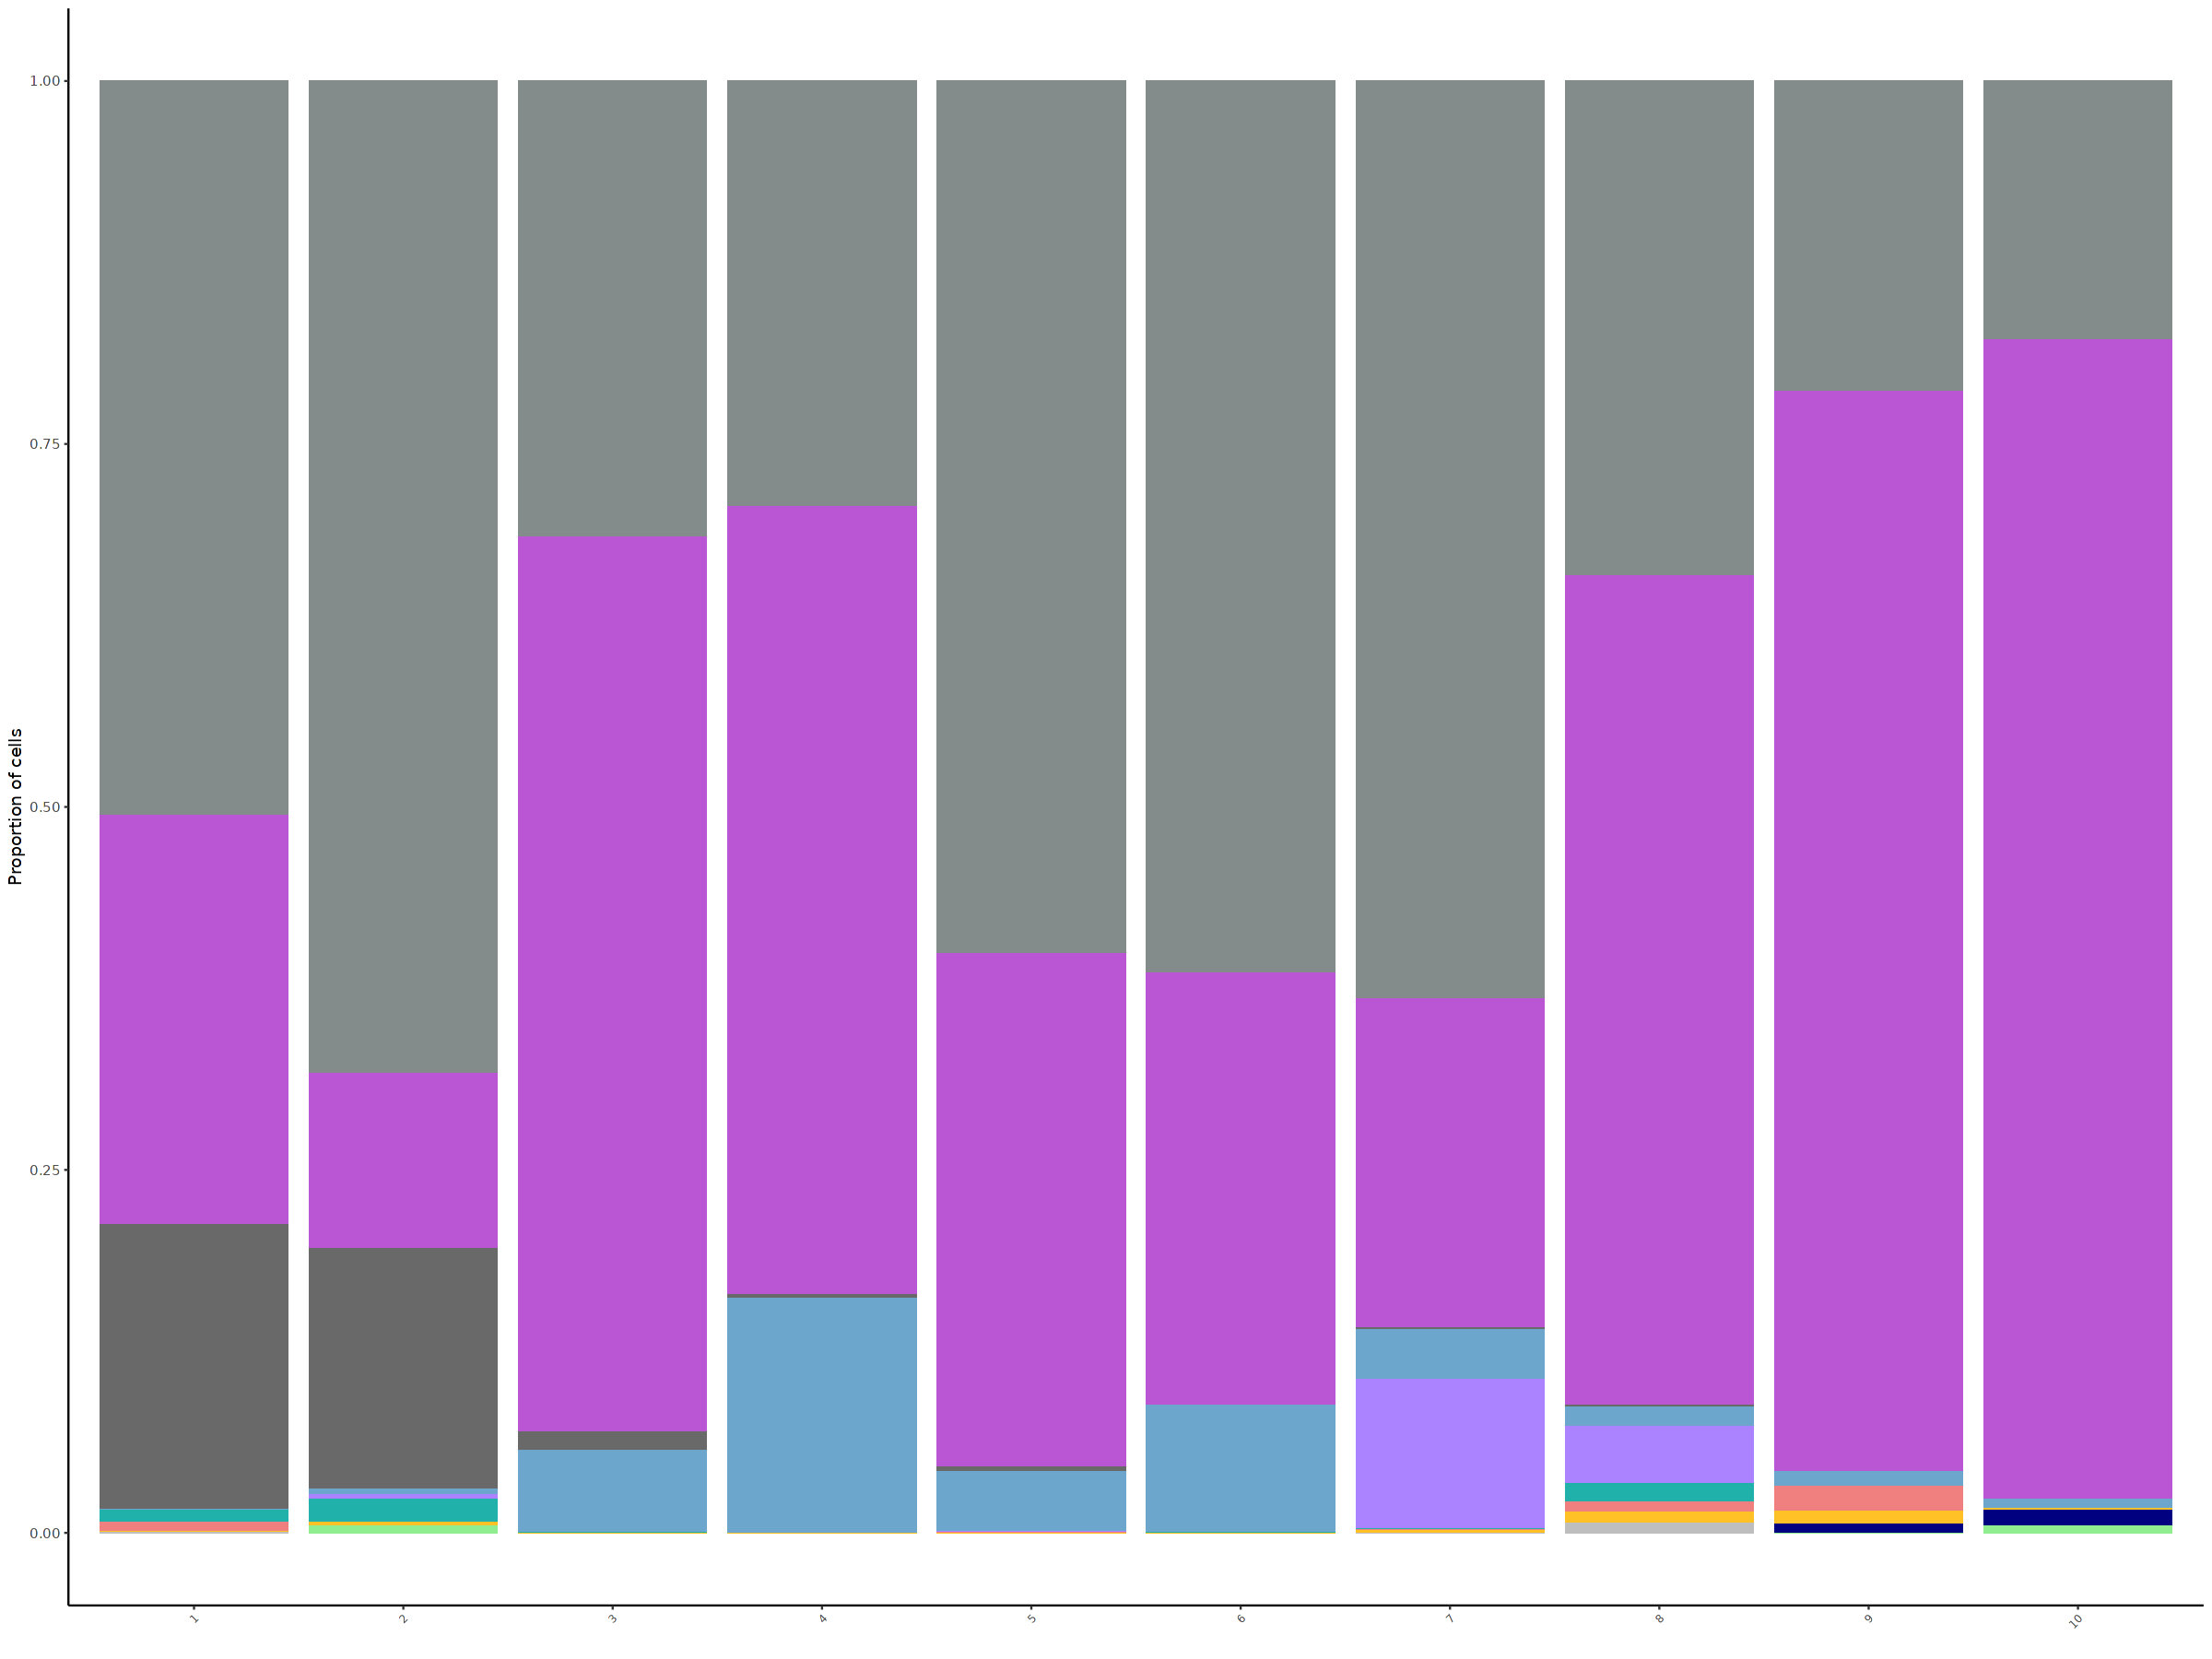

In [7]:
# Calculate cell type proportions
prop.pro <- data.frame(prop.table(table(data.pro$celltype2,data.pro$pt_bin)))

colnames(prop.pro) <- c("CellType","Bin", "Frac")
prop.pro$CellType <- as.character(prop.pro$CellType)
prop.pro$Bin <- as.character(prop.pro$Bin)

prop.pro$CellType <- factor(prop.pro$CellType, levels=c("PT_Tumor","eGBO_Tumor","Proliferating","Radial Glia","Mesenchyme","Neural Crest",
                                                                  "Neuroepithelial","Retina Progenitor","Neuronal","Microglia","Endothelial"))
prop.pro$Bin <- factor(prop.pro$Bin, levels=c("1","2","3","4","5","6","7","8","9","10"))

options(repr.plot.width = 8, repr.plot.height = 15)

myColors <- c("azure4","mediumorchid","dimgray","skyblue3","mediumpurple1","lightseagreen","lightcoral","goldenrod1","navyblue","lightgreen","gray")

prop.pro.plot <- ggplot(prop.pro, aes(fill=factor(CellType), y=Frac, x=Bin)) +
  geom_bar(position="fill", stat="identity", width = .9) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 7)) +
  labs(x = "", y = "Proportion of cells") +
  guides(fill = guide_legend(title="Cell Type")) + scale_fill_manual(values=myColors) + NoLegend()

options(repr.plot.width=20, repr.plot.height=15)
prop.pro.plot

In [11]:
Idents(data.mes) <- 'orig.ident'
levels(data.mes)

[1] "TXP_MES" "MGH102"  "MGH113"  "MGH136"  "MGH151"  "MES"

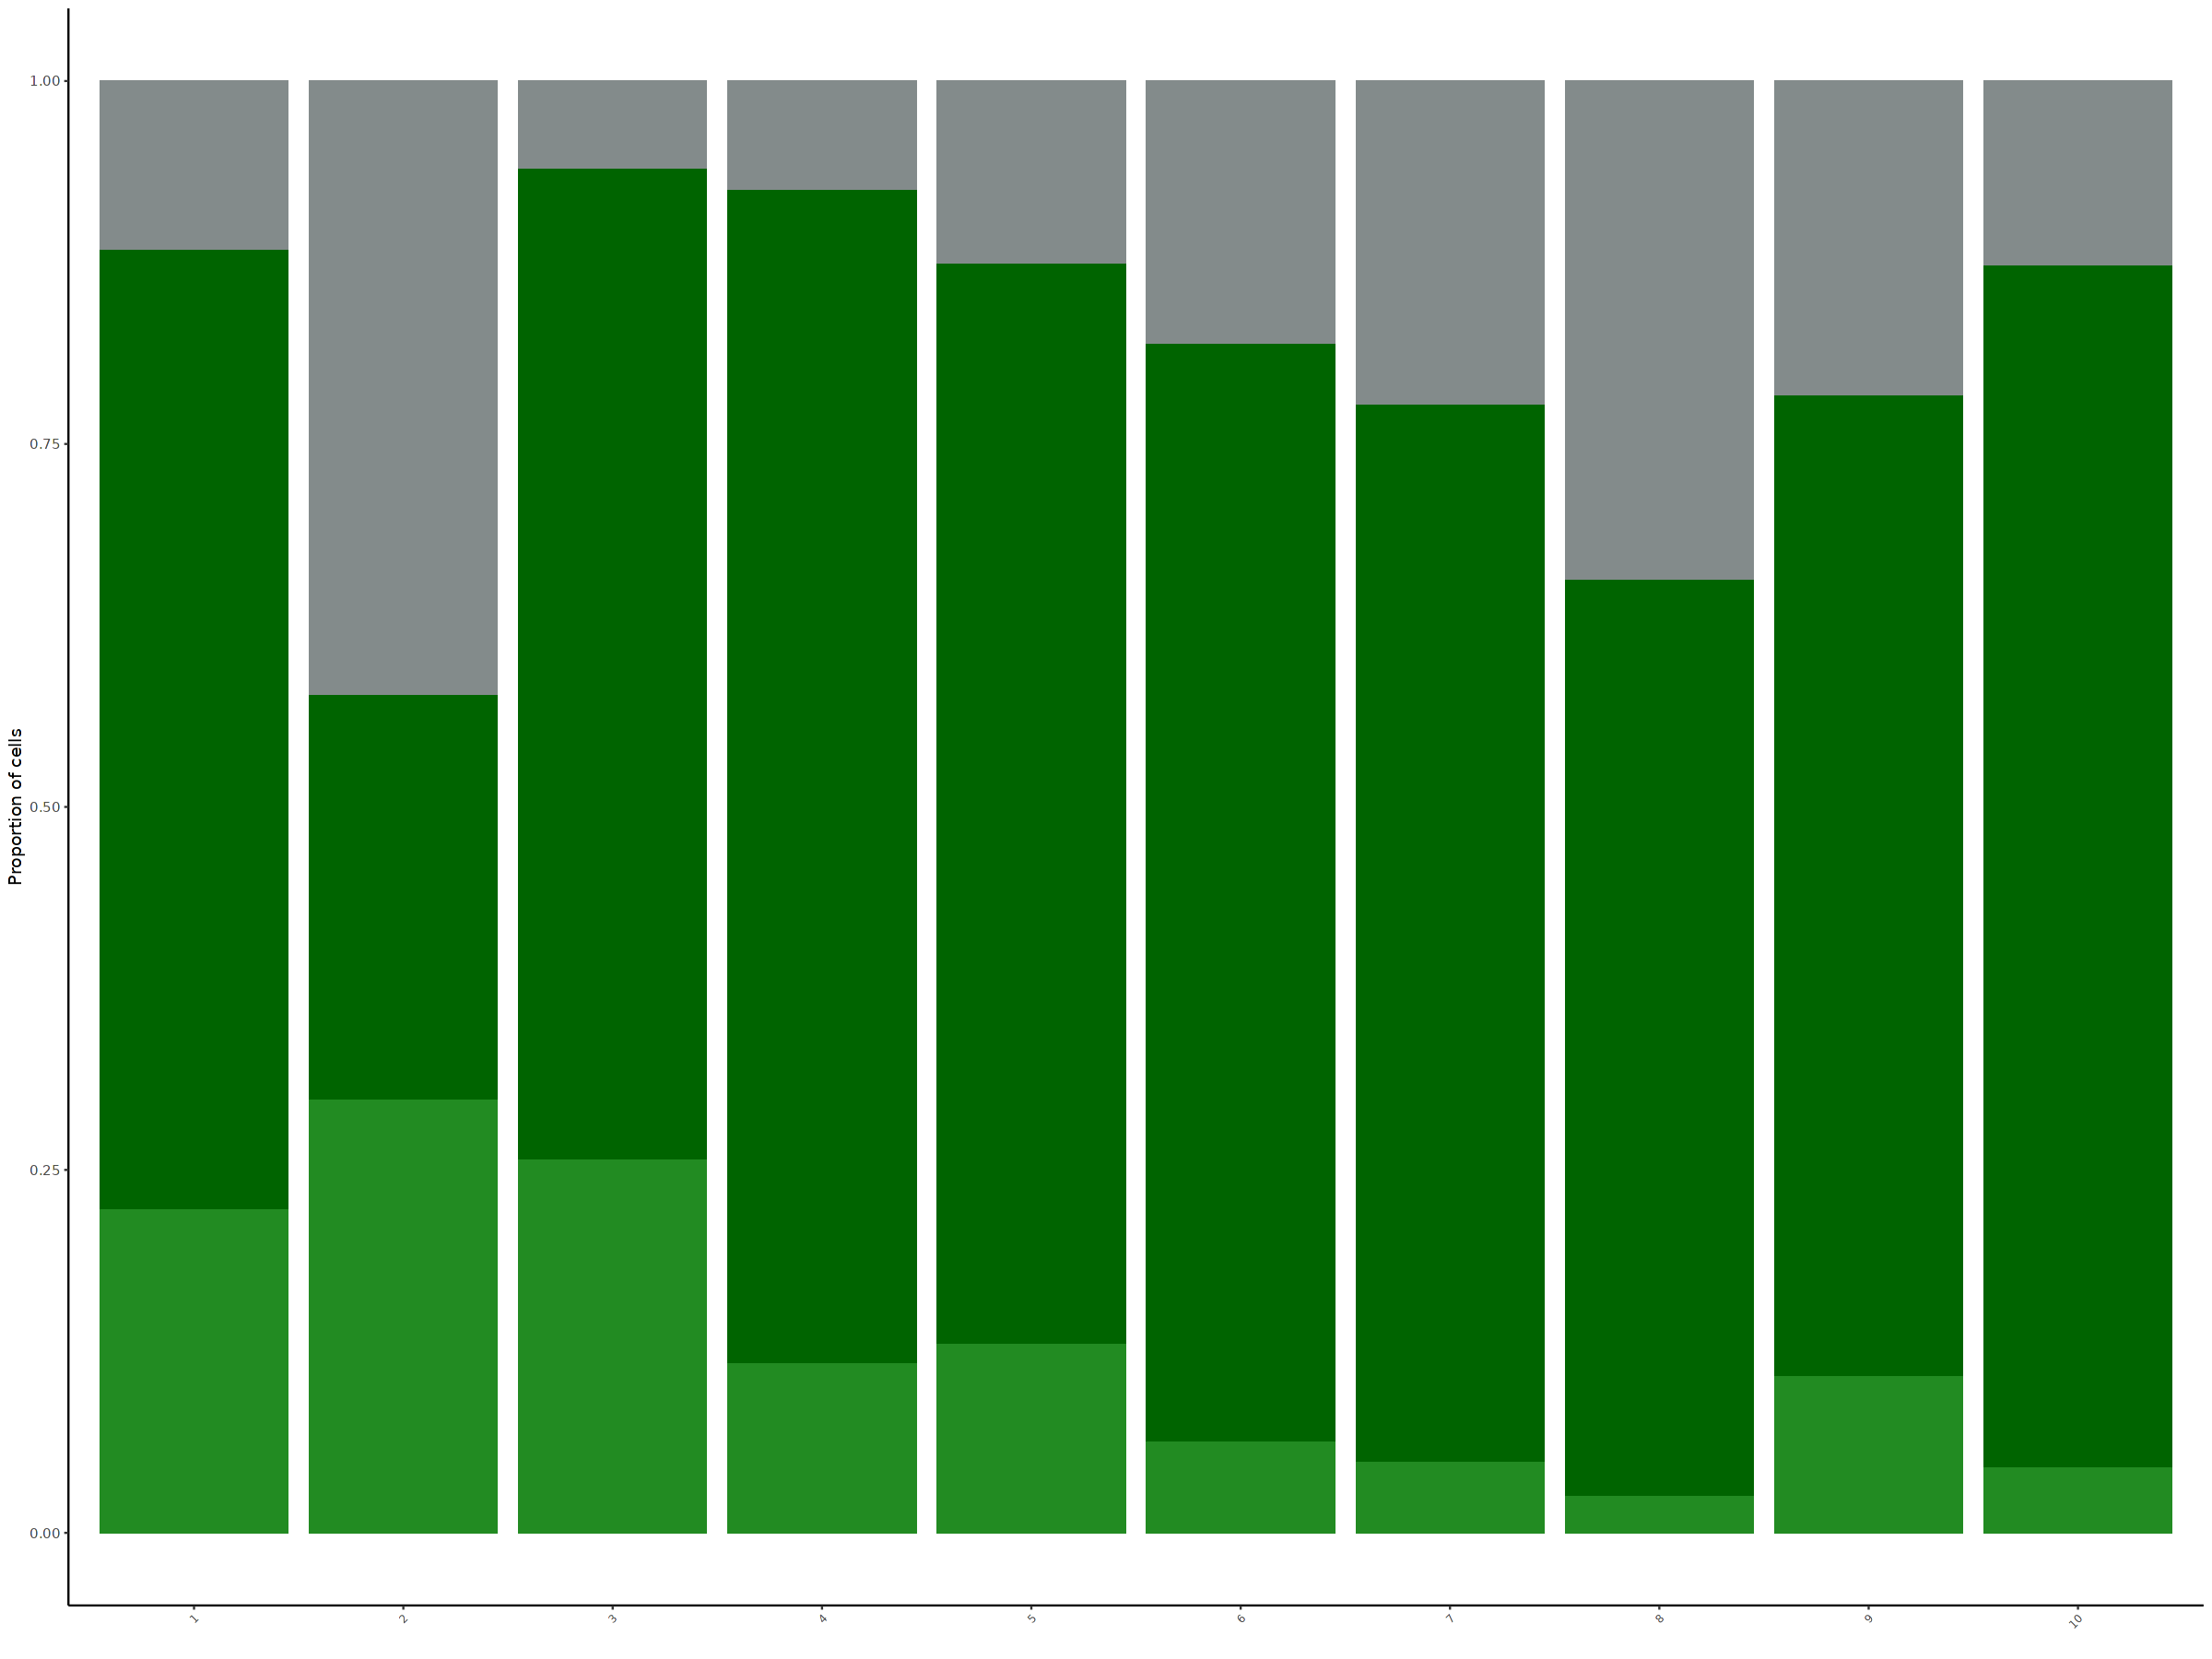

In [13]:
# Calculate cell type proportions
prop.mes <- data.frame(prop.table(table(data.mes$orig.ident,data.mes$pt_bin)))

colnames(prop.mes) <- c("Source","Bin", "Frac")
prop.mes$Source <- as.character(prop.mes$Source)
prop.mes$Bin <- as.character(prop.mes$Bin)

prop.mes$Source <- factor(prop.mes$Source, levels=c("MGH102","MGH113","MGH136","MGH151","TXP_MES","MES"))
prop.mes$Bin <- factor(prop.mes$Bin, levels=c("1","2","3","4","5","6","7","8","9","10"))

options(repr.plot.width = 8, repr.plot.height = 15)

myColors <- c("azure4","azure4","azure4","azure4","darkgreen","forestgreen")

prop.mes.plot <- ggplot(prop.mes, aes(fill=factor(Source), y=Frac, x=Bin)) +
  geom_bar(position="fill", stat="identity", width = .9) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 7)) +
  labs(x = "", y = "Proportion of cells") +
  guides(fill = guide_legend(title="Cell Type")) + scale_fill_manual(values=myColors) + NoLegend()

options(repr.plot.width=20, repr.plot.height=15)
prop.mes.plot

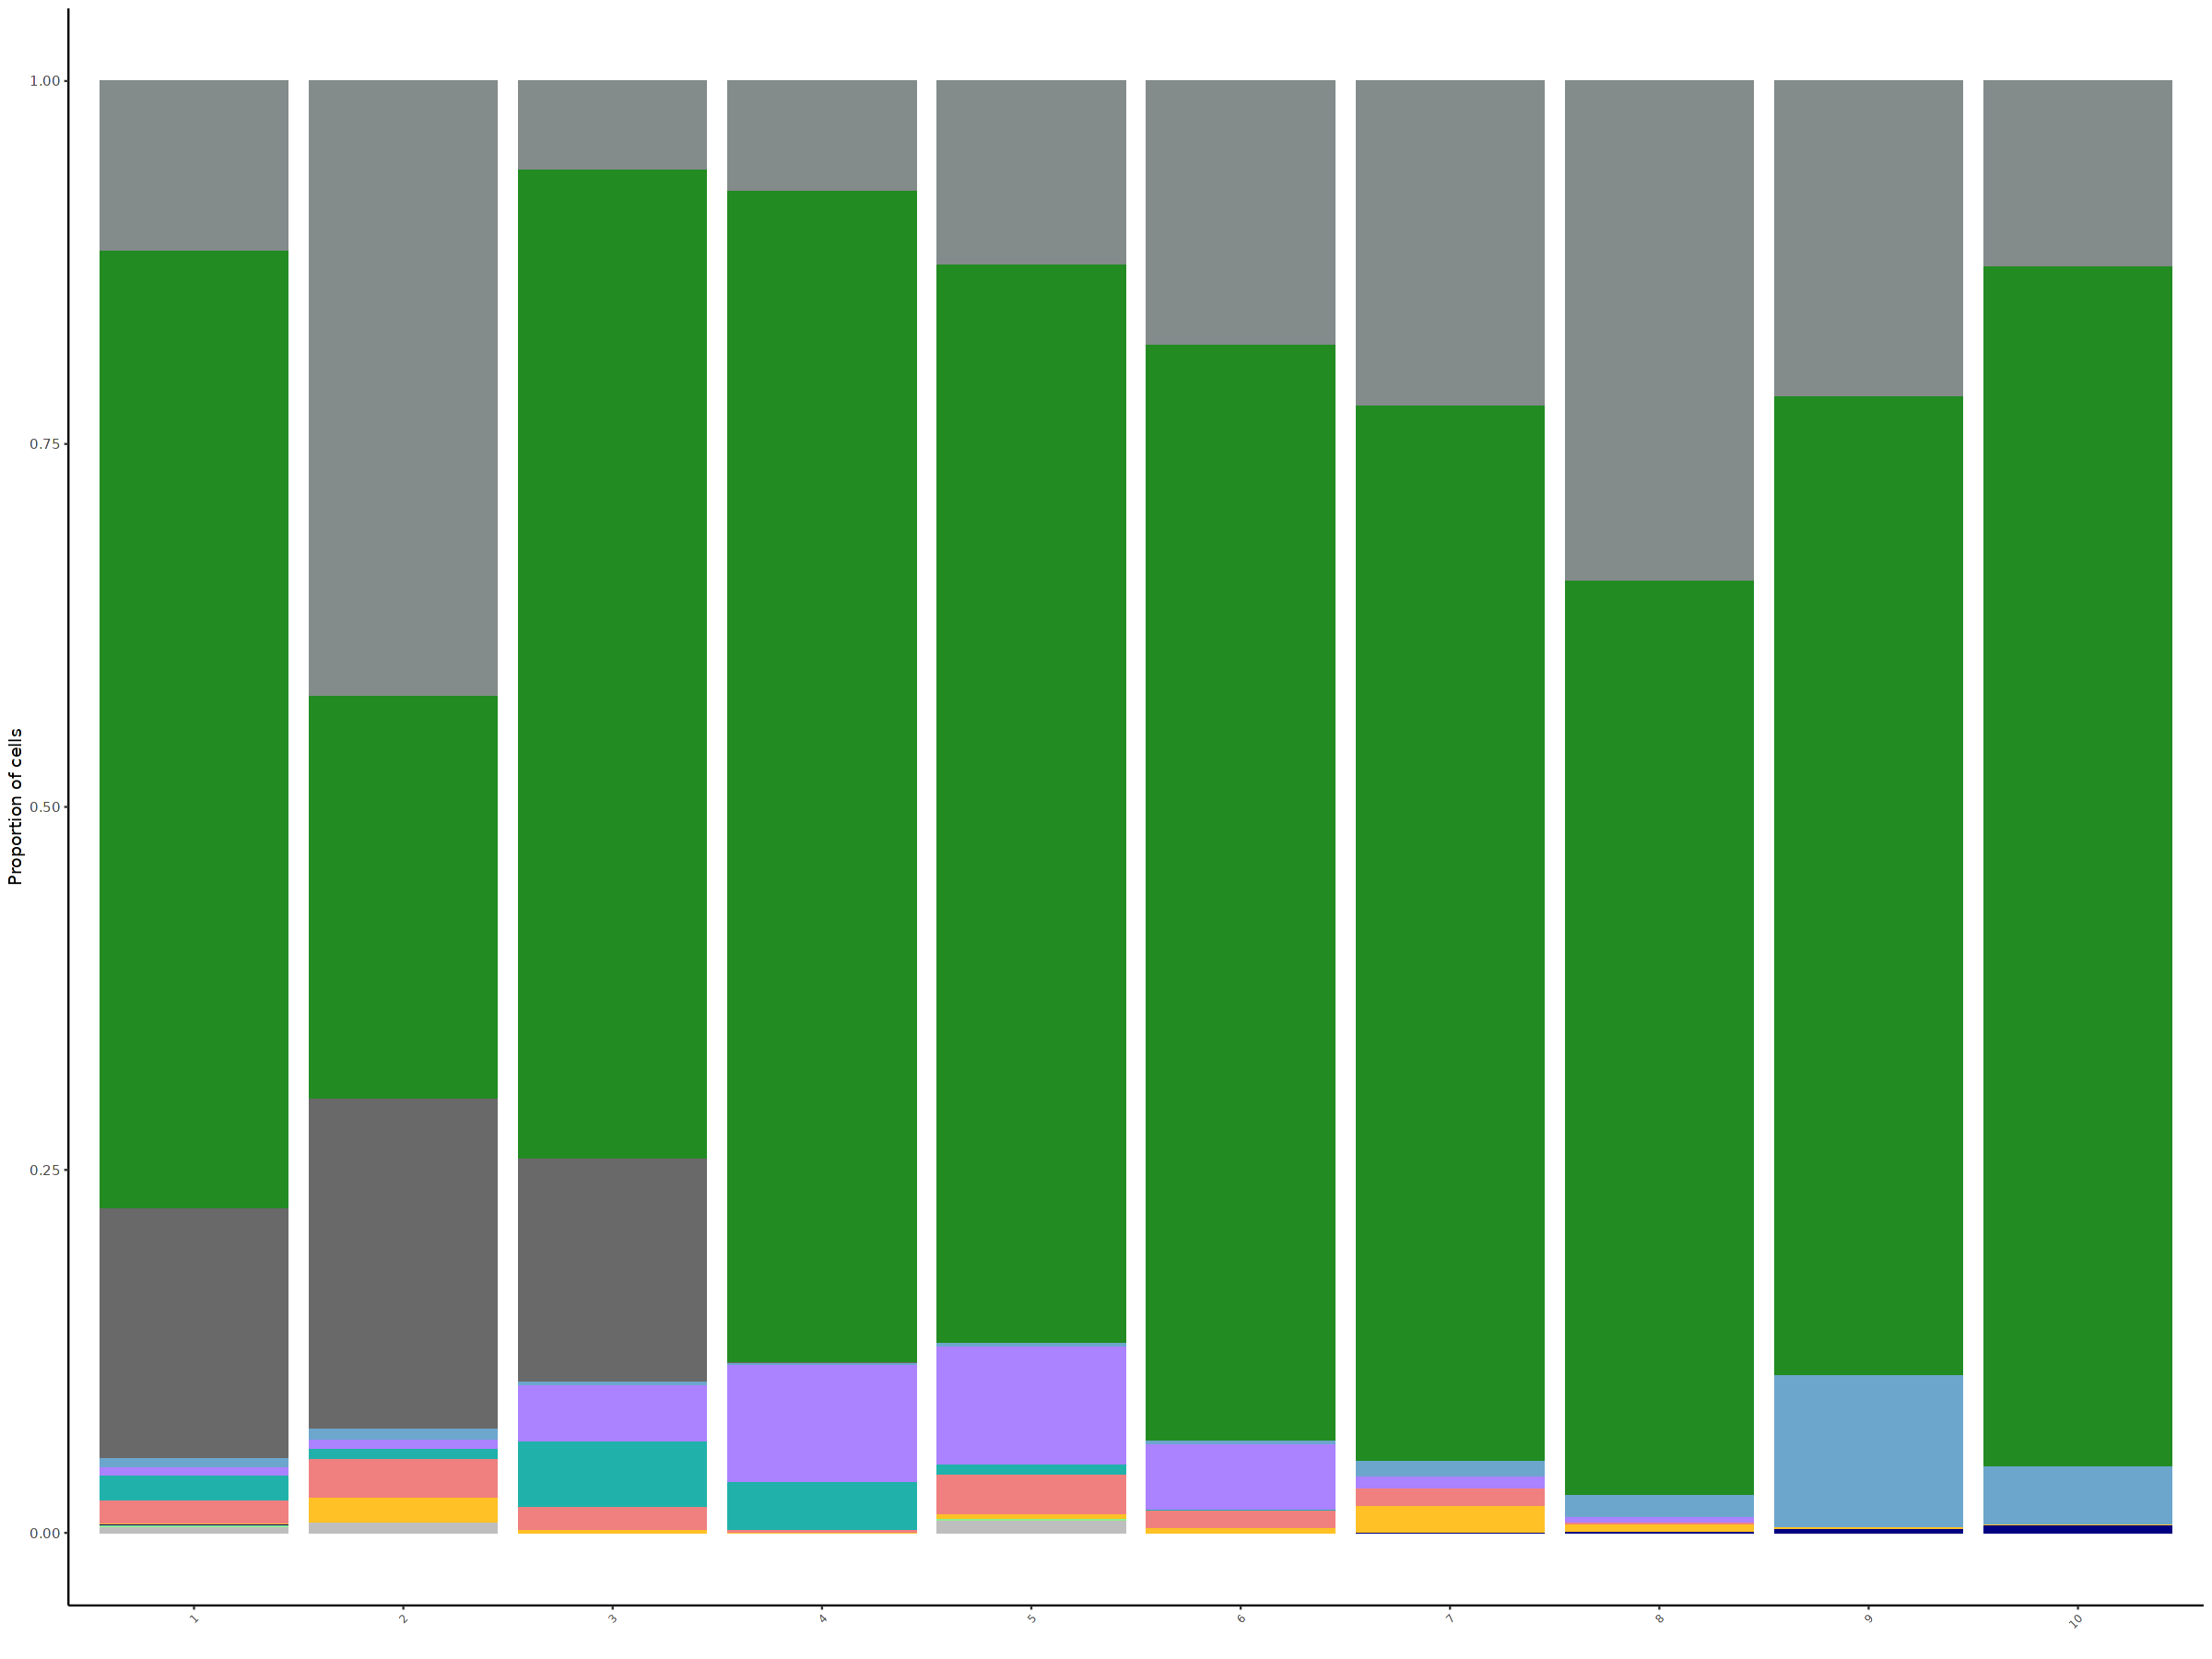

In [18]:
# Calculate cell type proportions
prop.mes <- data.frame(prop.table(table(data.mes$celltype2,data.mes$pt_bin)))

colnames(prop.mes) <- c("CellType","Bin", "Frac")
prop.mes$CellType <- as.character(prop.mes$CellType)
prop.mes$Bin <- as.character(prop.mes$Bin)

prop.mes$CellType <- factor(prop.mes$CellType, levels=c("PT_Tumor","eGBO_Tumor","Proliferating","Radial Glia","Mesenchyme","Neural Crest",
                                                                  "Neuroepithelial","Retina Progenitor","Neuronal","Microglia","Endothelial"))
prop.mes$Bin <- factor(prop.mes$Bin, levels=c("1","2","3","4","5","6","7","8","9","10"))

options(repr.plot.width = 8, repr.plot.height = 15)

myColors <- c("azure4","forestgreen","dimgray","skyblue3","mediumpurple1","lightseagreen","lightcoral","goldenrod1","navyblue","lightgreen","gray")

prop.mes.plot <- ggplot(prop.mes, aes(fill=factor(CellType), y=Frac, x=Bin)) +
  geom_bar(position="fill", stat="identity", width = .9) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 7)) +
  labs(x = "", y = "Proportion of cells") +
  guides(fill = guide_legend(title="Cell Type")) + scale_fill_manual(values=myColors) + NoLegend()

options(repr.plot.width=20, repr.plot.height=15)
prop.mes.plot

In [22]:
library(viridis)
viridis (n = 10, alpha = 1, begin = 0, end = 1, direction = 1, option = "D")

[1] "#440154FF" "#482878FF" "#3E4A89FF" "#31688EFF" "#26828EFF" "#1F9E89FF"
 [7] "#35B779FF" "#6DCD59FF" "#B4DE2CFF" "#FDE725FF"

# 6f

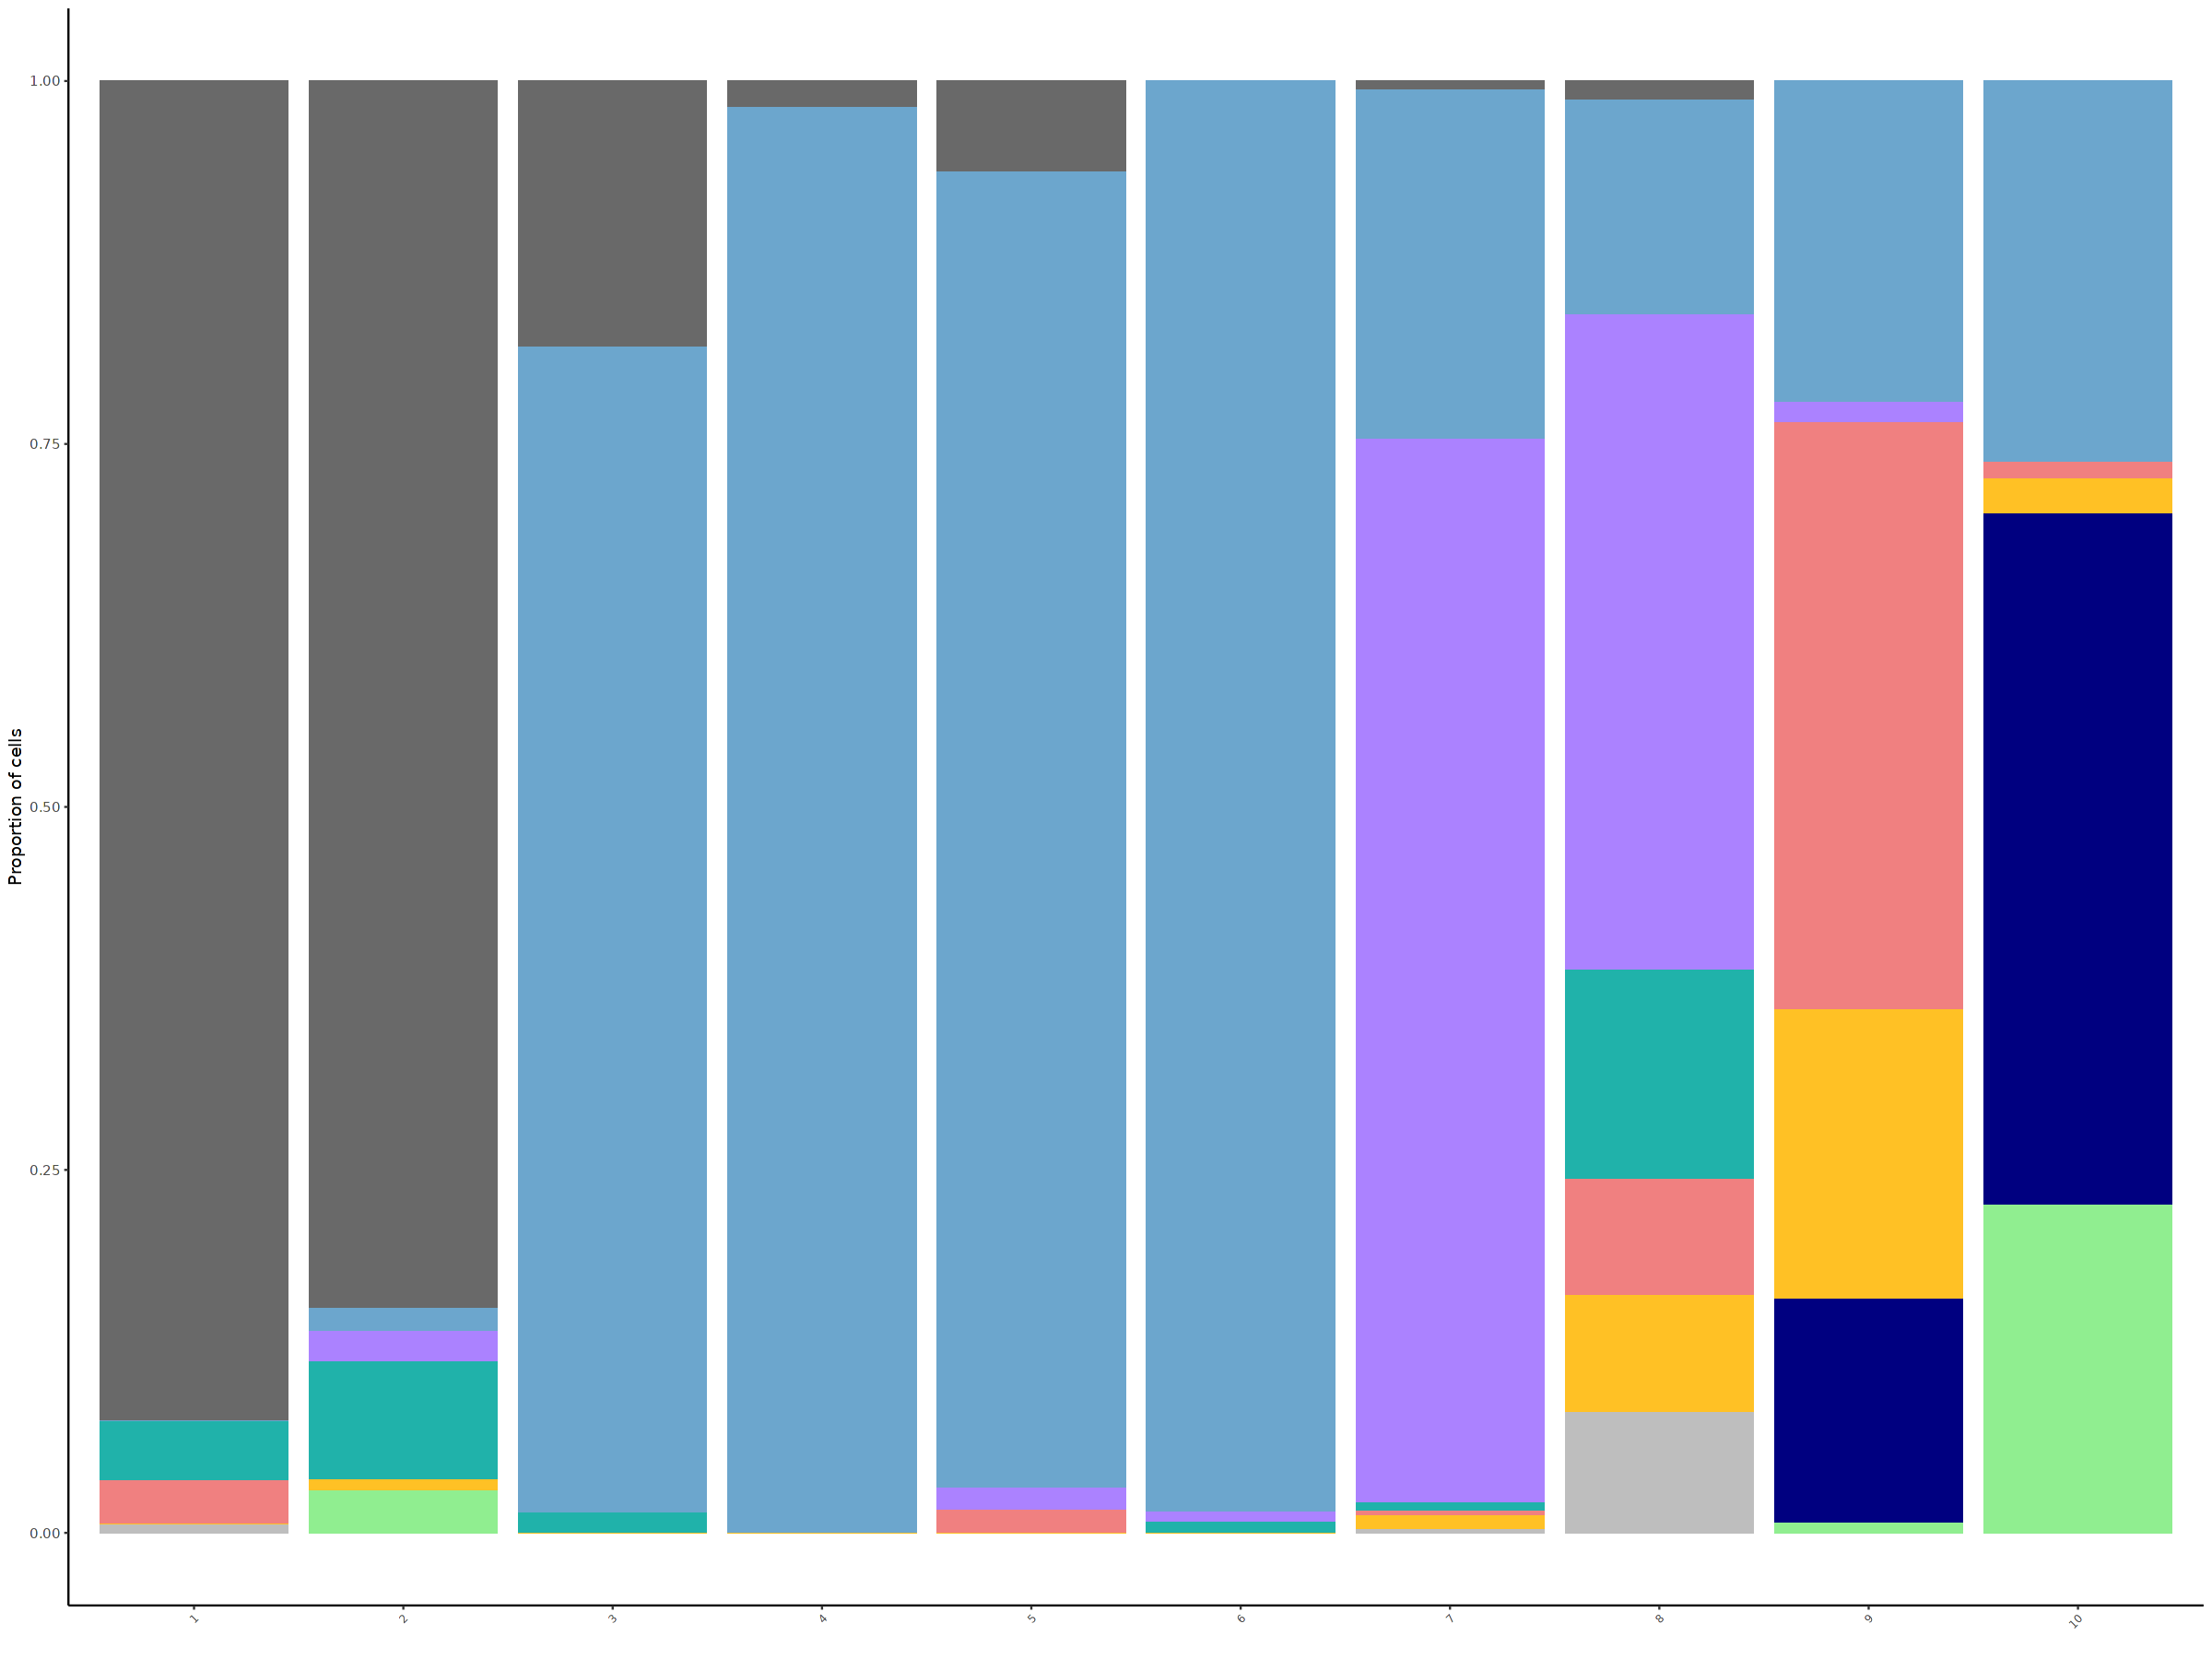

In [23]:
pro.egbo <- subset(data.pro, idents ='PRO')

# Calculate cell type proportions
prop.pro <- data.frame(prop.table(table(pro.egbo$celltype2,pro.egbo$pt_bin)))

colnames(prop.pro) <- c("CellType","Bin", "Frac")
prop.pro$CellType <- as.character(prop.pro$CellType)
prop.pro$Bin <- as.character(prop.pro$Bin)

prop.pro$CellType <- factor(prop.pro$CellType, levels=c("Proliferating","Radial Glia","Mesenchyme","Neural Crest",
                                                                  "Neuroepithelial","Retina Progenitor","Neuronal","Microglia","Endothelial"))
prop.pro$Bin <- factor(prop.pro$Bin, levels=c("1","2","3","4","5","6","7","8","9","10"))

options(repr.plot.width = 8, repr.plot.height = 15)

myColors <- c("dimgray","skyblue3","mediumpurple1","lightseagreen","lightcoral","goldenrod1","navyblue","lightgreen","gray")

prop.pro.plot <- ggplot(prop.pro, aes(fill=factor(CellType), y=Frac, x=Bin)) +
  geom_bar(position="fill", stat="identity", width = .9) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 7)) +
  labs(x = "", y = "Proportion of cells") +
  guides(fill = guide_legend(title="Cell Type")) + scale_fill_manual(values=myColors) + NoLegend()

options(repr.plot.width=20, repr.plot.height=15)
prop.pro.plot

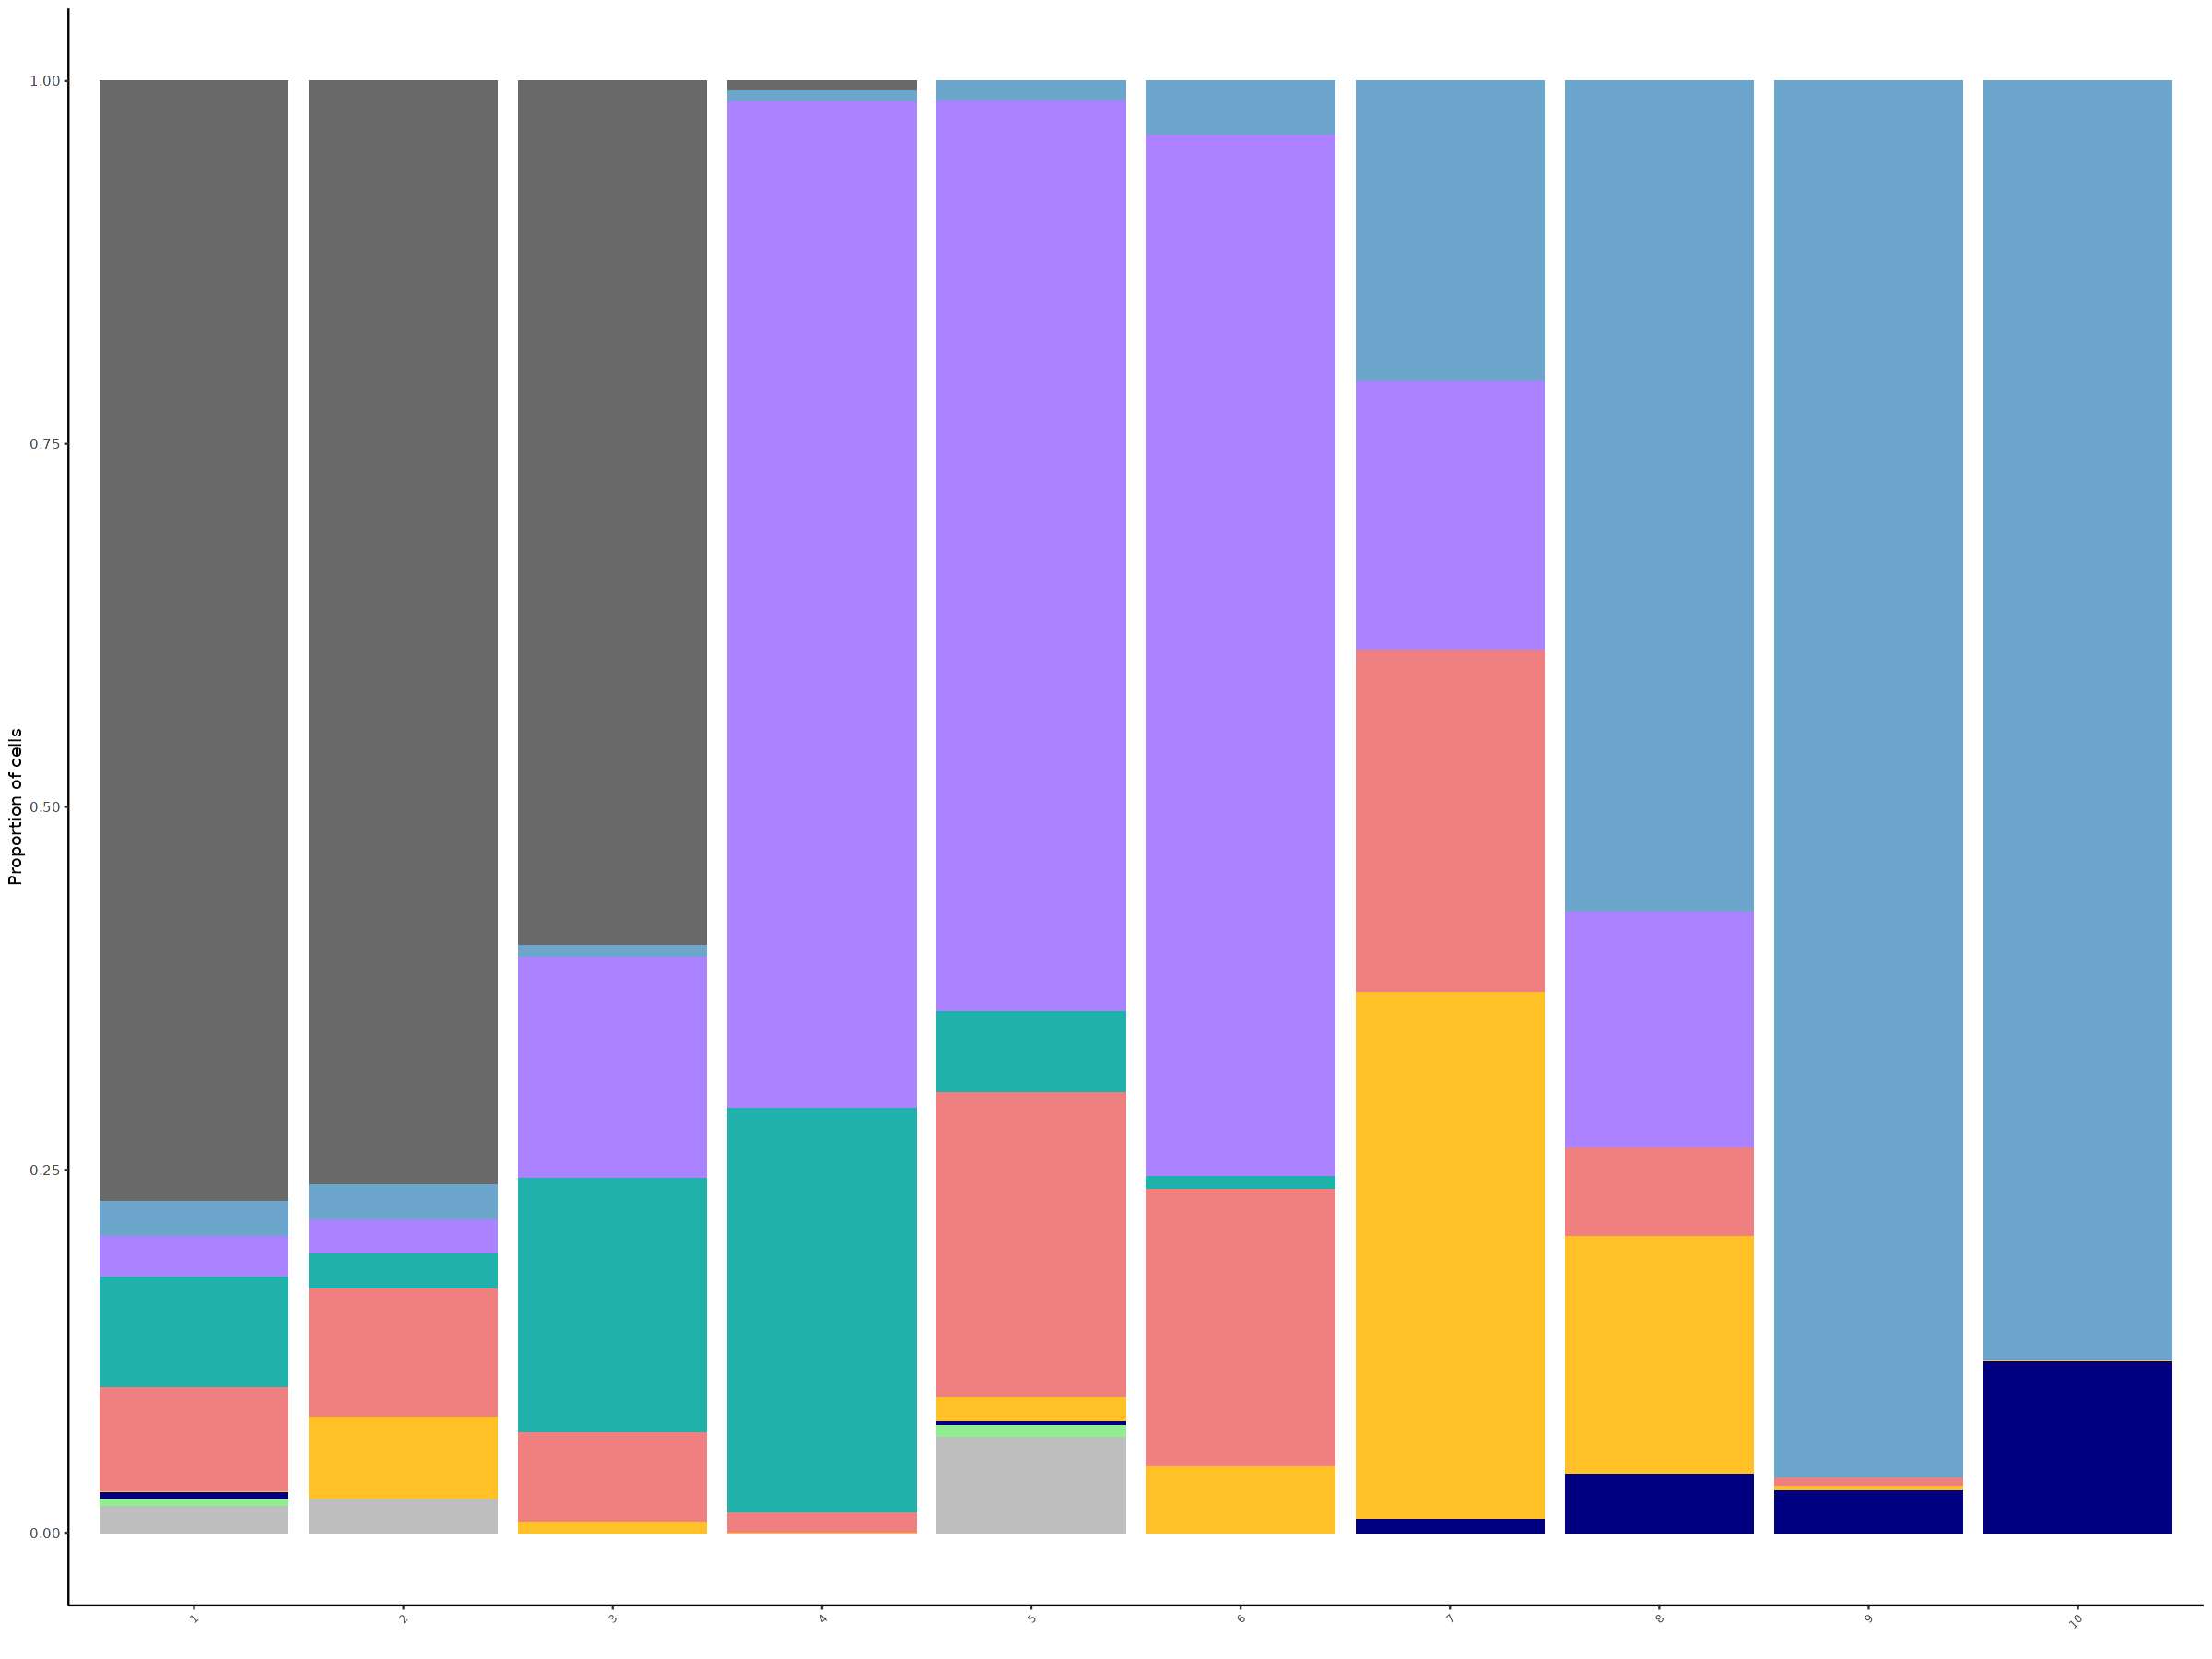

In [21]:
mes.egbo <- subset(data.mes, idents ='MES')

# Calculate cell type proportions
prop.mes <- data.frame(prop.table(table(mes.egbo$celltype2,mes.egbo$pt_bin)))

colnames(prop.mes) <- c("CellType","Bin", "Frac")
prop.mes$CellType <- as.character(prop.mes$CellType)
prop.mes$Bin <- as.character(prop.mes$Bin)

prop.mes$CellType <- factor(prop.mes$CellType, levels=c("Proliferating","Radial Glia","Mesenchyme","Neural Crest",
                                                                  "Neuroepithelial","Retina Progenitor","Neuronal","Microglia","Endothelial"))
prop.mes$Bin <- factor(prop.mes$Bin, levels=c("1","2","3","4","5","6","7","8","9","10"))

options(repr.plot.width = 8, repr.plot.height = 15)

myColors <- c("dimgray","skyblue3","mediumpurple1","lightseagreen","lightcoral","goldenrod1","navyblue","lightgreen","gray")

prop.mes.plot <- ggplot(prop.mes, aes(fill=factor(CellType), y=Frac, x=Bin)) +
  geom_bar(position="fill", stat="identity", width = .9) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 7)) +
  labs(x = "", y = "Proportion of cells") +
  guides(fill = guide_legend(title="Cell Type")) + scale_fill_manual(values=myColors) + NoLegend()

options(repr.plot.width=20, repr.plot.height=15)
prop.mes.plot